In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [89]:
colori_aggregati = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documenti\Python\Build week Python\Colori_aggregati.csv", encoding='utf-8')
df_esteso = pd.read_csv("Splittato_tutto.csv", encoding='utf-8')

In [9]:
# Raggruppa per le colonne specificate e conta le taglie uniche
modello_unici = colori_aggregati.groupby(['genere', 'marca', 'nome_prodotto', 'prezzo_effettivo', 'prezzo_ordinario', 'modello', 'sport', 'colori_split']).agg(
    numero_taglie=('taglia', 'nunique')
).reset_index()

# Visualizza il nuovo DataFrame
print(modello_unici.head())

# Opzionale: puoi ordinare il DataFrame per numero di taglie per vedere i modelli con più varietà
modello_unici = modello_unici.sort_values(by='numero_taglie', ascending=False)
print("\nDataFrame ordinato per numero di taglie:")
print(display(modello_unici)) #tms DataFrame con colori e taglia aggregati

  genere  marca                                      nome_prodotto  \
0  donna  ASICS  beyond ff - scarpe da pallavolo - light blue/w...   
1  donna  ASICS         beyond ff mt - scarpe da pallavolo - blanc   
2  donna  ASICS  blade ff - scarpe da pallavolo - light blue/bl...   
3  donna  ASICS  court 3 - scarpe da tennis per tutte le superf...   
4  donna  ASICS  court ff 3 - da tennis per terra battuta - ind...   

   prezzo_effettivo  prezzo_ordinario       modello  \
0            107.99            119.99     beyond ff   
1            115.00            130.00  beyond ff mt   
2            107.99            119.99      blade ff   
3            151.99            189.99       court 3   
4            151.99            189.99    court ff 3   

                                     sport           colori_split  \
0                      scarpe da pallavolo       light blue/white   
1                      scarpe da pallavolo                  blanc   
2                      scarpe da pallavol

,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,sport,colori_split,numero_taglie
798,unisex,UNDER ARMOUR,reign lifter unisex - scarpe da allenamento - ...,199.99,199.99,reign lifter unisex,scarpe da allenamento,black/white,22
579,donna,UNDER ARMOUR,apparition - scarpe da allenamento - white/cas...,90.99,129.99,apparition,scarpe da allenamento,white/castlerock/ares red,19
676,donna,UNDER ARMOUR,scarpe da corsa su strada - white,130.00,130.00,unknown,scarpe da corsa su strada,white,19
711,unisex,NEW BALANCE,480 unisex - scarpe da basket - dark mushroom,99.99,99.99,480 unisex,scarpe da basket,dark mushroom,19
741,unisex,PUMA,cell thrill unisex - scarpe da allenamento - b...,64.99,64.99,cell thrill unisex,scarpe da allenamento,black black,19
...,...,...,...,...,...,...,...,...,...
1633,uomo,PUMA,ultra match fg/ag - scarpe da calcetto con tac...,71.37,84.95,ultra match fg/ag,scarpe da calcetto con tacchetti,black/asphalt,1
1324,uomo,PUMA,deviate nitro - scarpe da corsa su strada - bl...,170.00,170.00,deviate nitro,scarpe da corsa su strada,black sun stream,1
1641,uomo,PUMA,ultra match mg - scarpe da calcetto con tacche...,47.50,47.50,ultra match mg,scarpe da calcetto con tacchetti,poison pink/white/black,1
1642,uomo,PUMA,ultra match tt - scarpe da calcetto con tacche...,71.37,84.95,ultra match tt,scarpe da calcetto con tacchetti,black/asphalt,1


None


### Analisi della distribuzione delle marche

In [11]:
# contare quanti dati offre ogni marca per avere un'idea della loro distribuzione
marca_somma = modello_unici['marca'].value_counts()
print(f'Quanti dati abbiamo per ogni marca: {marca_somma}')

Quanti dati abbiamo per ogni marca: marca
PUMA            700
ASICS           381
UNDER ARMOUR    299
NEW BALANCE     190
MIZUNO          144
JOMA             97
DIADORA          18
Name: count, dtype: int64


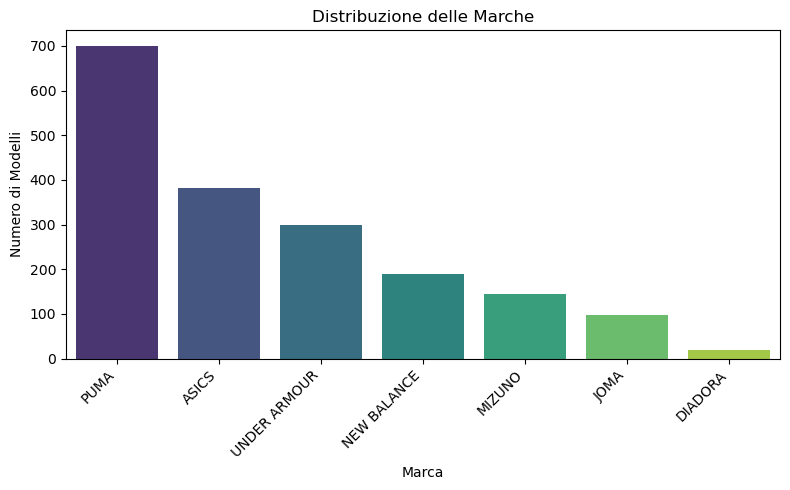

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=marca_somma.index, y=marca_somma.values, hue=marca_somma.index, palette="viridis", legend=False)

plt.title('Distribuzione delle Marche')

plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

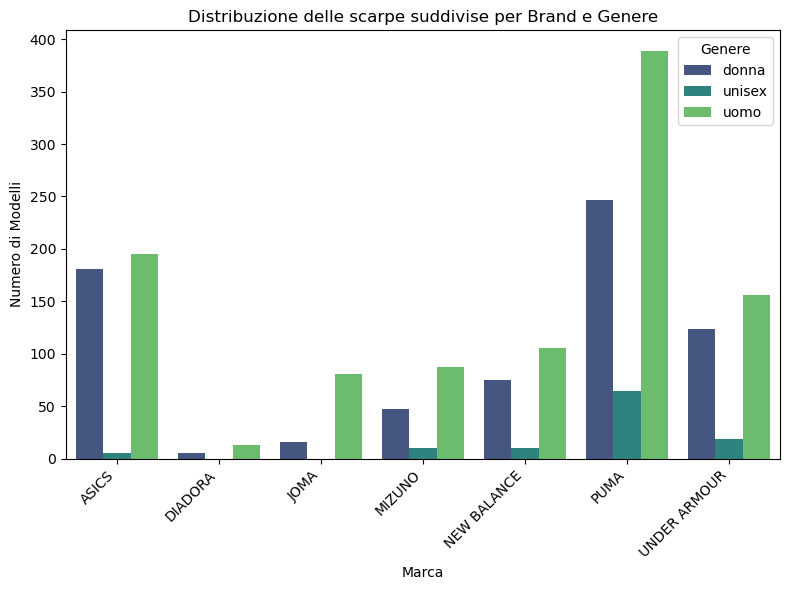

In [13]:
# facciamo un graffico con la distribuzione delle scarpe suddivise per marca e genere sul sito Zalando
marca_genere_somma = modello_unici.groupby(['marca', 'genere']).size().reset_index(name='Numero')

plt.figure(figsize=(8, 6))
sns.barplot(data=marca_genere_somma, x='marca', y='Numero', hue='genere', palette="viridis")

plt.title('Distribuzione delle scarpe suddivise per Brand e Genere')
plt.xlabel('Marca')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()

In [14]:
# Per vedere il numero reale di modello per categoria sport prenderemmo i dati dal modello_unici, perche nel csv lo stesso modello si ripete per ogni taglia presente
sport_conteggio = modello_unici['sport'].value_counts()
print('\nNumero di modelli per categoria:')
print(sport_conteggio)


Numero di modelli per categoria:
sport
scarpe da corsa su strada                  573
scarpe da calcetto con tacchetti           310
scarpe da allenamento                      184
scarpe da trail running                    145
scarpe da basket                           145
scarpe da pallavolo                         84
scarpe da pallamano                         64
da tennis per terra battuta                 61
scarpe da tennis per tutte le superfici     59
scarpe da calcetto                          43
scarpe da golf                              38
scarpe da calcio con tacchetti              36
scarpe da padel                             31
scarpe da camminata                         24
ciabatte da mare                            20
scarpa da hiking                             5
scarpa da rugby                              4
scarponi da montagna                         2
stivali da neve                              1
Name: count, dtype: int64


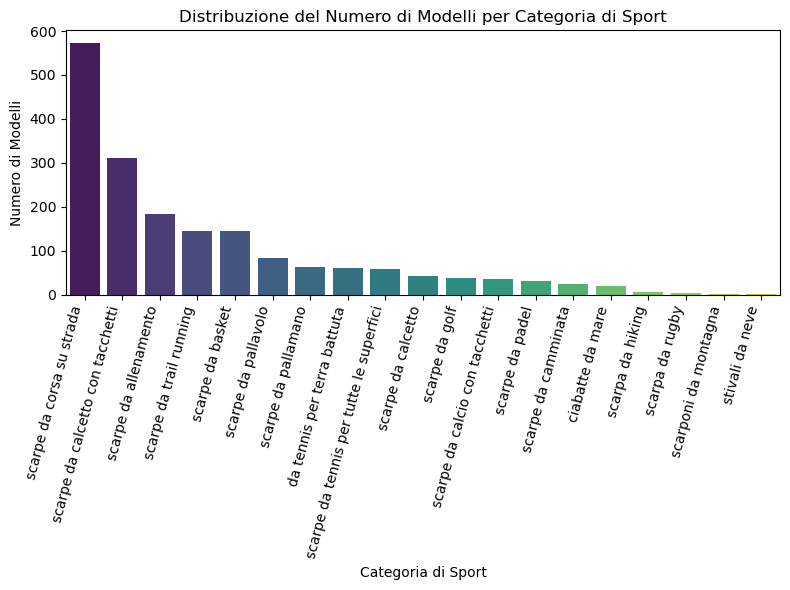

In [15]:
# prova visualizzazzione con un barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=sport_conteggio.index, y=sport_conteggio.values, hue=sport_conteggio.index, palette="viridis", legend=False)
plt.title('Distribuzione del Numero di Modelli per Categoria di Sport')
plt.xlabel('Categoria di Sport')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

### Analisi della presenza del Brand sul sito Zalando

In [20]:
# raggruppa i dati per categoria di sport
raggruppa_sport_marca = modello_unici.groupby(['sport', 'marca'])[['prezzo_effettivo', 'prezzo_ordinario']].sum()

In [21]:
raggruppa_sport_marca  = raggruppa_sport_marca .sort_values(by=["prezzo_effettivo", "prezzo_ordinario"])
raggruppa_sport_marca 

prezzo_effettivo  \
sport                            marca                            
scarpe da corsa su strada        JOMA                     47.73   
scarpe da trail running          JOMA                     50.00   
scarpe da camminata              ASICS                    69.99   
scarpa da hiking                 PUMA                     82.95   
scarpe da camminata              NEW BALANCE              99.95   
...                                                         ...   
scarpe da corsa su strada        NEW BALANCE            8925.34   
                                 UNDER ARMOUR          13011.63   
                                 PUMA                  14472.15   
scarpe da calcetto con tacchetti PUMA                  20933.12   
scarpe da corsa su strada        ASICS                 25257.60   

                                               prezzo_ordinario  
sport                            marca                           
scarpe da corsa su strada        JOMA                     47.73  
scarpe da trail running          JOMA                     50.00  
scarpe da camminata              ASICS                    69.99  
scarpa da hiking                 PUMA                    110.00  
scarpe da camminata              NEW BALANCE              99.95  
...                                                         ...  
scarpe da corsa su strada        NEW BALANCE            9079.34  
                                 UNDER ARMOUR          14335.24  
                                 PUMA                  17163.41  
scarpe da calcetto con tacchetti PUMA                  25737.46  
scarpe da corsa su strada        ASICS                 25958.32  

[71 rows x 2 columns]

### Analisi per categoria 'sport'

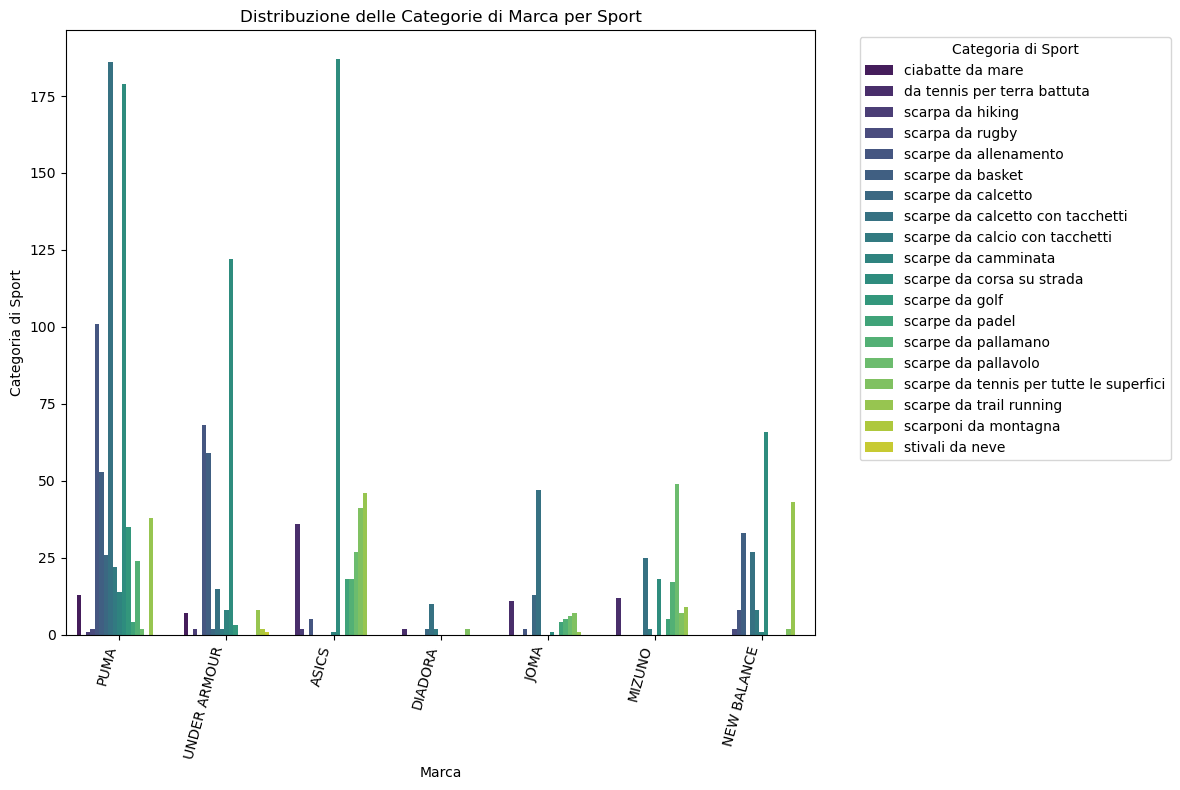

Categoria di scarpa offerta da ogni marca:
          marca                                              sport
0         ASICS  [scarpe da corsa su strada, scarpe da trail ru...
1       DIADORA  [scarpe da calcetto con tacchetti, scarpe da t...
2          JOMA  [scarpe da pallamano, scarpe da allenamento, s...
3        MIZUNO  [scarpe da pallavolo, scarpe da pallamano, sca...
4   NEW BALANCE  [scarpe da basket, scarpe da corsa su strada, ...
5          PUMA  [scarpe da allenamento, scarpe da basket, scar...
6  UNDER ARMOUR  [scarpe da allenamento, scarpe da corsa su str...

Categoria di scarpa offerta da ogni marca (formato leggibile):
Marca: ASICS
Sport: scarpe da corsa su strada, scarpe da trail running, da tennis per terra battuta, scarpe da tennis per tutte le superfici, scarpe da camminata, scarpa da hiking, scarpe da pallamano, scarpe da padel, scarpe da pallavolo, scarpe da allenamento
------------------------------
Marca: DIADORA
Sport: scarpe da calcetto con tacchetti, scarpe d

In [23]:
# 1. Grafico per vedere ogni marca quale categoria di sport rientra:

# Calcola il numero di modelli per ogni combinazione di marca e sport
num_prodotti = modello_unici.groupby(['sport', 'marca']).size().reset_index(name='num_prodotti')

# Crea il grafico a barre impilate
plt.figure(figsize=(12, 8))
sns.barplot(x='marca', y='num_prodotti', hue='sport', data=num_prodotti, palette='viridis')

# Aggiungi etichette e titolo
plt.xlabel('Marca')
plt.ylabel('Categoria di Sport')
plt.title('Distribuzione delle Categorie di Marca per Sport')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Categoria di Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Codice per vedere ogni marca che sport ha:

# Trova gli sport unici per ogni marca
sport_per_marca = modello_unici.groupby('marca')['sport'].unique().reset_index()

# Stampa il risultato
print("Categoria di scarpa offerta da ogni marca:")
print(sport_per_marca)

# Vusualizzazione del risultato
print("\nCategoria di scarpa offerta da ogni marca (formato leggibile):")
for index, row in sport_per_marca.iterrows():
    print(f"Marca: {row['marca']}")
    print(f"Sport: {', '.join(row['sport'])}")
    print("-" * 30)


### Distribuzione dei prezzi per ogni brand e confronto con il brand MIZUNO

### Analisi dei Prezzi Minimi, Massimi e Medi per la categoria Sport dal sito Zalando confronto al brand MIZUNO

### Distribuzione del numero di prodotti per categoria di sport per vedere quali categorie sono piu presenti sul sito Zalando

### Distribuzione dei prezzi per Categoria Sport in maniera tale che possiamo visualizzare e identificare eventuale categorie di Sport con prezzi variabili
### Abbiamo scelto di utilizzare un boxplot

## Distribuzione prezzo effettivo/ordinario per marca e prezzo - VERTICALE

## Distribuzione prezzo (SOLO) effettivo per marca

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18748\4138253134.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18748\4138253134.py:13: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


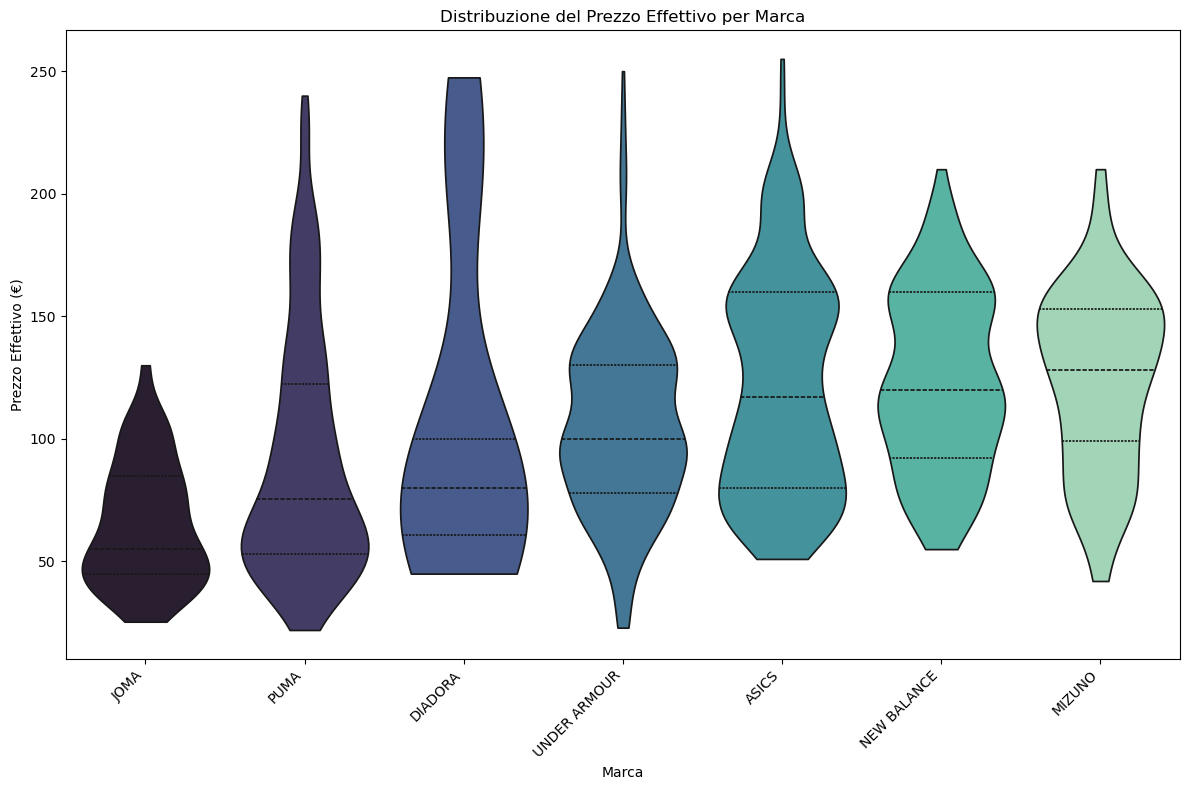

In [37]:
# Ordina le marche in base alla mediana del prezzo effettivo
ordine_marche = modello_unici.groupby('marca')['prezzo_effettivo'].median().sort_values().index

# Lista di colonne da visualizzare
colonne_prezzi = [
    ('prezzo_effettivo', 'Prezzo Effettivo (€)', 'Distribuzione del Prezzo Effettivo per Marca')
   
]

# Crea un violin plot per ciascun tipo di prezzo
for colonna, etichetta_y, titolo in colonne_prezzi:
    plt.figure(figsize=(12, 8))
    sns.violinplot(
        x='marca',
        y=colonna,
        data=modello_unici,
        order=ordine_marche,
        palette='mako',
        scale='width',
        cut=0,
        inner='quartile'
    )

    plt.xlabel('Marca')
    plt.ylabel(etichetta_y)
    plt.title(titolo)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("distribuzione_prezzo_per_marca.png", dpi=300, bbox_inches='tight')
    plt.show()

## Distribuzione prezzo effettivo/ordinario per marca e prezzo - ORIZONTALE

In [ ]:
# Ordina le categorie per la mediana del prezzo effettivo
ordine_sport = modello_unici.groupby('marca')['prezzo_effettivo'].median().sort_values().index

# Lista di colonne da visualizzare
colonne_prezzi = [
    ('prezzo_effettivo', 'Prezzo Effettivo (€)', 'Distribuzione del Prezzo Effettivo per Marca'),
    ('prezzo_ordinario', 'Prezzo Ordinario (€)', 'Distribuzione del Prezzo Ordinario per Marca')
]

for colonna, etichetta_x, titolo in colonne_prezzi:
    plt.figure(figsize=(10, 8))
    sns.violinplot(
        y='marca',
        x=colonna,
        data=modello_unici,
        order=ordine_sport,
        cut=0,                # Non estendere oltre i dati reali
        inner='quartile',     # Mostra le bande di quartili
        density_norm='width'  # Usa density_norm per evitare il warning
    )

    plt.ylabel('sport')
    plt.xlabel(etichetta_x)
    plt.title(titolo)
    plt.tight_layout()
    plt.show()


## MIZUNO VS COMPETITOR - la larghezza del violino è detarminata dalla concentazione del numero di modelli, quindi la densità per ogni marchio per il range di prezzo tra min e max e all'interno del violino vengono identificati il primo quartile 25°, la mediana e l'ultimo quartile 75°

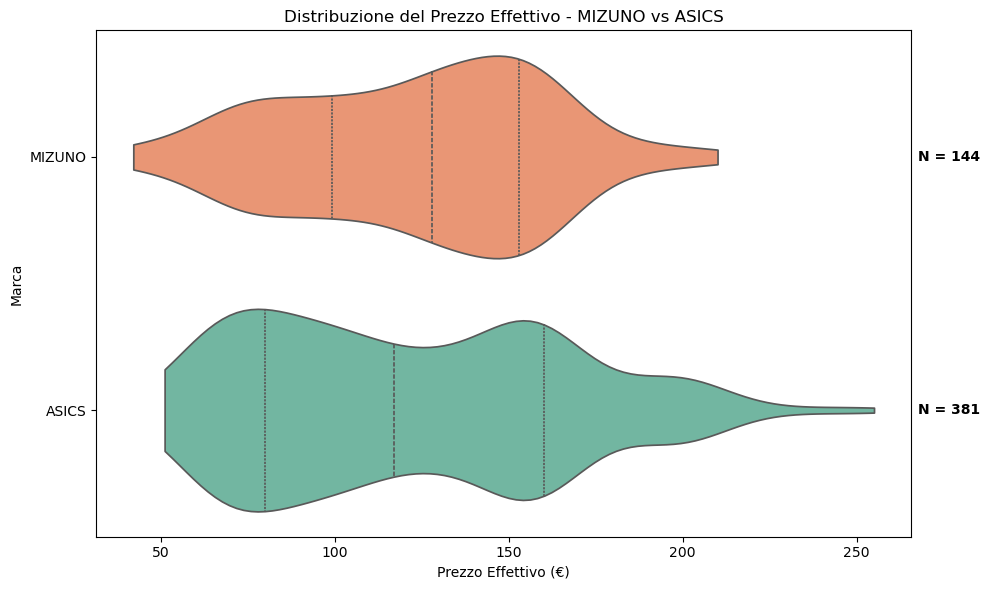

In [41]:
# CAMBIA QUI il nome del competitor che vuoi confrontare
competitor = 'ASICS'  # oppure 'PUMA', 'JOMA', ecc.

# Filtra i dati
df_confronto = modello_unici[modello_unici['marca'].isin(['MIZUNO', competitor])]

# Ordine fisso
ordine_marche = ['MIZUNO', competitor]

# Calcola numero di modelli per ciascuna marca
conteggi = df_confronto['marca'].value_counts()

# Violin plot orizzontale con hue
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='prezzo_effettivo',  # Prezzo sull'asse X
    y='marca',             # Marca sull'asse Y
    data=df_confronto,
    order=ordine_marche,
    hue='marca',           # Aggiunto hue per differenziare le marche
    palette='Set2',        # Usa una palette di colori per differenziare le marche
    density_norm='width',  # Usa density_norm invece di scale
    cut=0,
    inner='quartile'       # Mostra le bande di quartili
)

# Annotazioni: numero di modelli a destra di ogni violino
for i, marca in enumerate(ordine_marche):
    n = conteggi.get(marca, 0)
    plt.text(df_confronto['prezzo_effettivo'].max() * 1.05, i,  # Posizionato a destra del violino
             f'N = {n}', ha='left', va='center', fontsize=10, fontweight='bold')

# Etichette e titolo
plt.ylabel('Marca')
plt.xlabel('Prezzo Effettivo (€)')
plt.title(f'Distribuzione del Prezzo Effettivo - MIZUNO vs {competitor}')
plt.tight_layout()

# Salva l'immagine come PNG
plt.savefig('grafico_mizuno_vs_asics.png', dpi=50, bbox_inches='tight')

# Mostra il grafico
plt.show()


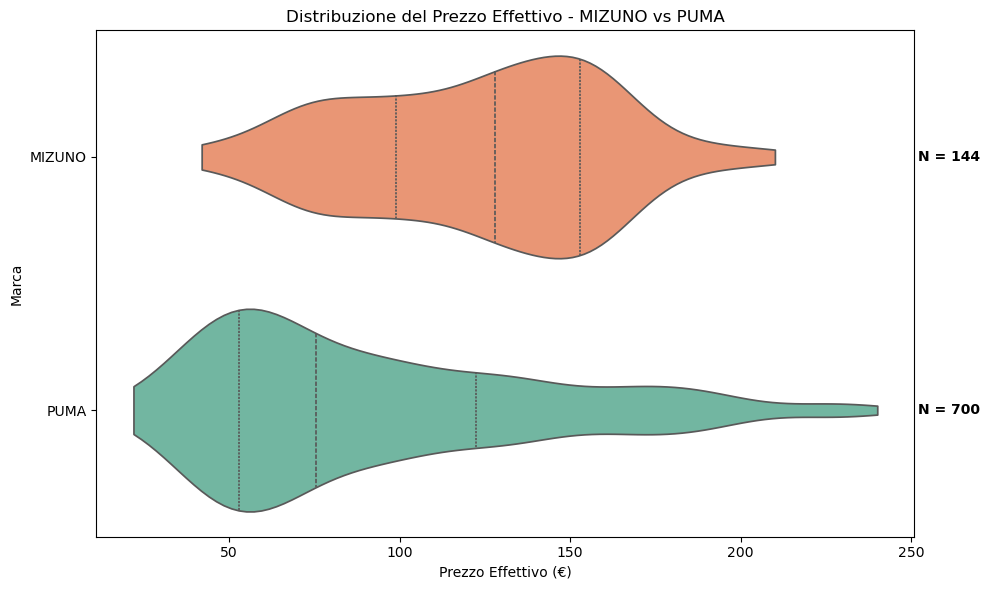

In [42]:
# CAMBIA QUI il nome del competitor che vuoi confrontare
competitor = 'PUMA'  # oppure 'PUMA', 'JOMA', ecc.

# Filtra i dati
df_confronto = modello_unici[modello_unici['marca'].isin(['MIZUNO', competitor])]

# Ordine fisso
ordine_marche = ['MIZUNO', competitor]

# Calcola numero di modelli per ciascuna marca
conteggi = df_confronto['marca'].value_counts()

# Violin plot orizzontale con hue
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='prezzo_effettivo',  # Prezzo sull'asse X
    y='marca',             # Marca sull'asse Y
    data=df_confronto,
    order=ordine_marche,
    hue='marca',           # Aggiunto hue per differenziare le marche
    palette='Set2',        # Usa una palette di colori per differenziare le marche
    density_norm='width',  # Usa density_norm invece di scale
    cut=0,
    inner='quartile'       # Mostra le bande di quartili
)

# Annotazioni: numero di modelli a destra di ogni violino
for i, marca in enumerate(ordine_marche):
    n = conteggi.get(marca, 0)
    plt.text(df_confronto['prezzo_effettivo'].max() * 1.05, i,  # Posizionato a destra del violino
             f'N = {n}', ha='left', va='center', fontsize=10, fontweight='bold')

# Etichette e titolo
plt.ylabel('Marca')
plt.xlabel('Prezzo Effettivo (€)')
plt.title(f'Distribuzione del Prezzo Effettivo - MIZUNO vs {competitor}')
plt.tight_layout()

# Salva l'immagine come PNG
plt.savefig('grafico_mizuno_vs_puma.png', dpi=50, bbox_inches='tight')

# Mostra il grafico
plt.show()


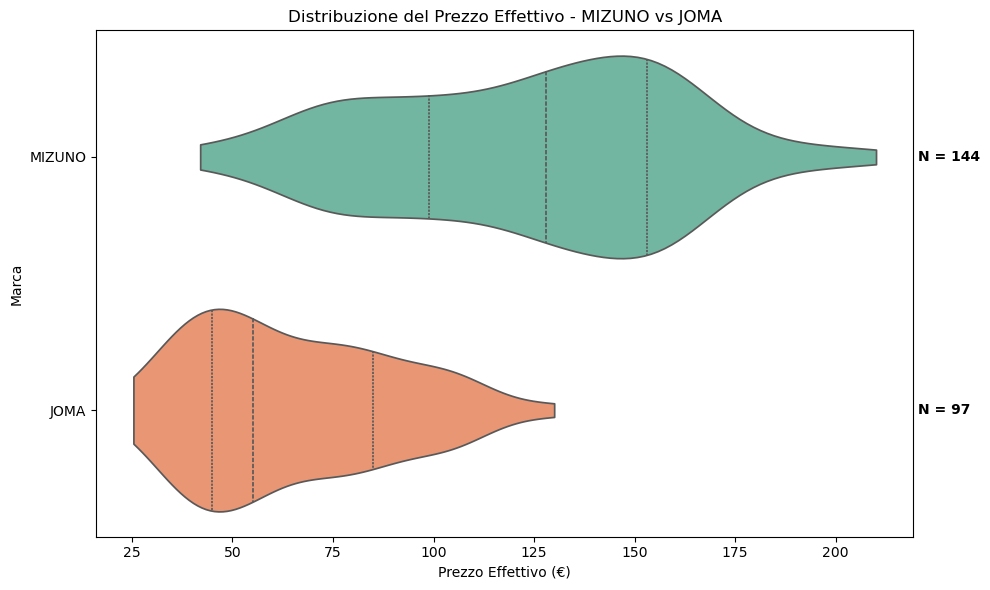

In [43]:
# CAMBIA QUI il nome del competitor che vuoi confrontare
competitor = 'JOMA'  # oppure 'PUMA', 'JOMA', ecc.

# Filtra i dati
df_confronto = modello_unici[modello_unici['marca'].isin(['MIZUNO', competitor])]

# Ordine fisso
ordine_marche = ['MIZUNO', competitor]

# Calcola numero di modelli per ciascuna marca
conteggi = df_confronto['marca'].value_counts()

# Violin plot orizzontale con hue
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='prezzo_effettivo',  # Prezzo sull'asse X
    y='marca',             # Marca sull'asse Y
    data=df_confronto,
    order=ordine_marche,
    hue='marca',           # Aggiunto hue per differenziare le marche
    palette='Set2',        # Usa una palette di colori per differenziare le marche
    density_norm='width',  # Usa density_norm invece di scale
    cut=0,
    inner='quartile'       # Mostra le bande di quartili
)

# Annotazioni: numero di modelli a destra di ogni violino
for i, marca in enumerate(ordine_marche):
    n = conteggi.get(marca, 0)
    plt.text(df_confronto['prezzo_effettivo'].max() * 1.05, i,  # Posizionato a destra del violino
             f'N = {n}', ha='left', va='center', fontsize=10, fontweight='bold')

# Etichette e titolo
plt.ylabel('Marca')
plt.xlabel('Prezzo Effettivo (€)')
plt.title(f'Distribuzione del Prezzo Effettivo - MIZUNO vs {competitor}')
plt.tight_layout()

# Salva l'immagine come PNG
plt.savefig('grafico_mizuno_vs_joma.png', dpi=50, bbox_inches='tight')

# Mostra il grafico
plt.show()


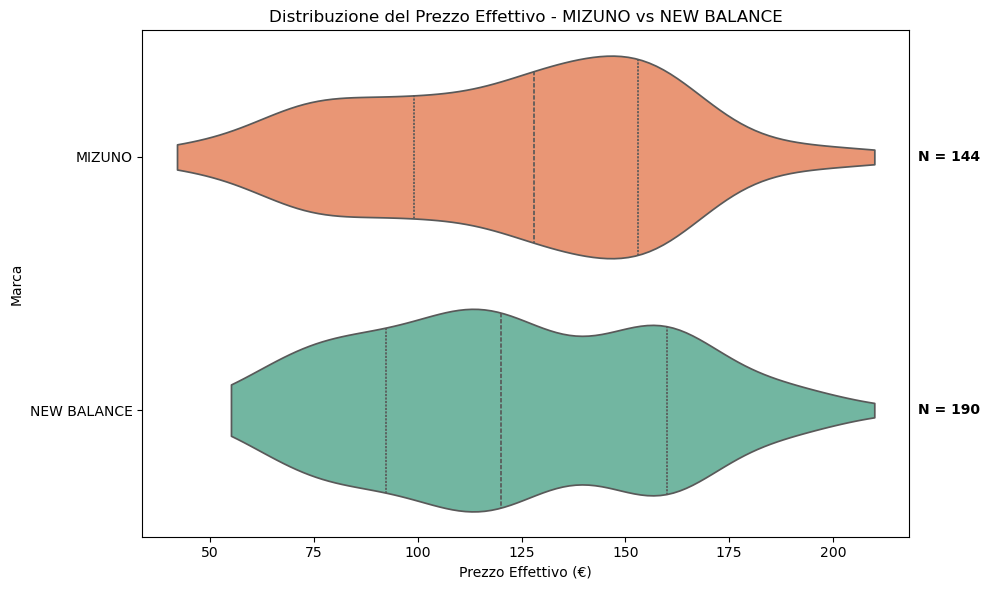

In [44]:
# CAMBIA QUI il nome del competitor che vuoi confrontare
competitor = 'NEW BALANCE'  # oppure 'PUMA', 'JOMA', ecc.

# Filtra i dati
df_confronto = modello_unici[modello_unici['marca'].isin(['MIZUNO', competitor])]

# Ordine fisso
ordine_marche = ['MIZUNO', competitor]

# Calcola numero di modelli per ciascuna marca
conteggi = df_confronto['marca'].value_counts()

# Violin plot orizzontale con hue
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='prezzo_effettivo',  # Prezzo sull'asse X
    y='marca',             # Marca sull'asse Y
    data=df_confronto,
    order=ordine_marche,
    hue='marca',           # Aggiunto hue per differenziare le marche
    palette='Set2',        # Usa una palette di colori per differenziare le marche
    density_norm='width',  # Usa density_norm invece di scale
    cut=0,
    inner='quartile'       # Mostra le bande di quartili
)

# Annotazioni: numero di modelli a destra di ogni violino
for i, marca in enumerate(ordine_marche):
    n = conteggi.get(marca, 0)
    plt.text(df_confronto['prezzo_effettivo'].max() * 1.05, i,  # Posizionato a destra del violino
             f'N = {n}', ha='left', va='center', fontsize=10, fontweight='bold')

# Etichette e titolo
plt.ylabel('Marca')
plt.xlabel('Prezzo Effettivo (€)')
plt.title(f'Distribuzione del Prezzo Effettivo - MIZUNO vs {competitor}')
plt.tight_layout()

# Salva l'immagine come PNG
plt.savefig('grafico_mizuno_vs_new_balance.png', dpi=60, bbox_inches='tight')

# Mostra il grafico
plt.show()


In [45]:
print(modello_unici['marca'].unique())

['UNDER ARMOUR' 'NEW BALANCE' 'PUMA' 'ASICS' 'MIZUNO' 'JOMA' 'DIADORA']


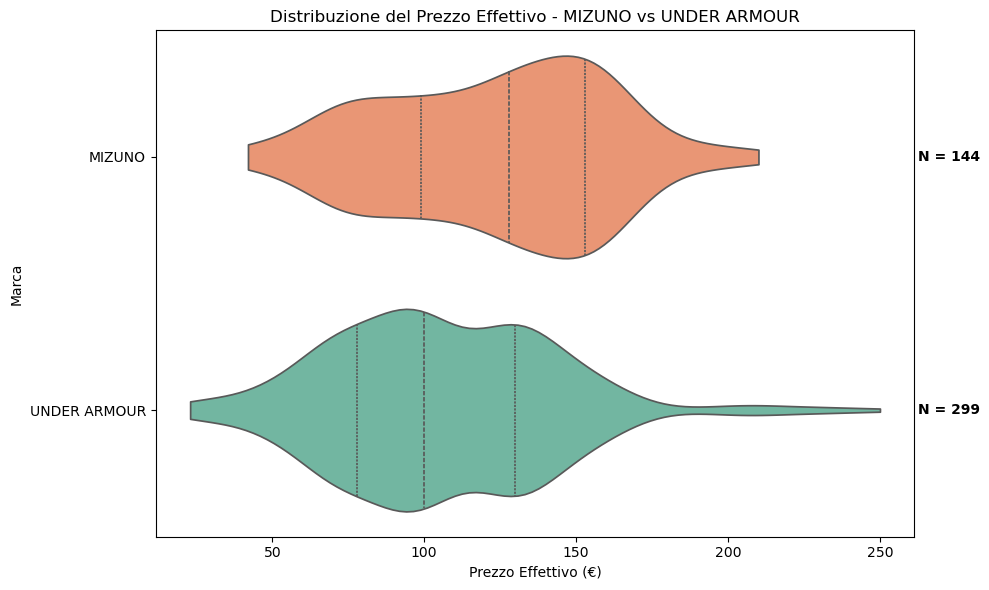

In [46]:
# CAMBIA QUI il nome del competitor che vuoi confrontare
competitor = 'UNDER ARMOUR'  # oppure 'PUMA', 'JOMA', ecc.

# Filtra i dati
df_confronto = modello_unici[modello_unici['marca'].isin(['MIZUNO', competitor])]

# Ordine fisso
ordine_marche = ['MIZUNO', competitor]

# Calcola numero di modelli per ciascuna marca
conteggi = df_confronto['marca'].value_counts()

# Violin plot orizzontale con hue
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='prezzo_effettivo',  # Prezzo sull'asse X
    y='marca',             # Marca sull'asse Y
    data=df_confronto,
    order=ordine_marche,
    hue='marca',           # Aggiunto hue per differenziare le marche
    palette='Set2',        # Usa una palette di colori per differenziare le marche
    density_norm='width',  # Usa density_norm invece di scale
    cut=0,
    inner='quartile'       # Mostra le bande di quartili
)

# Annotazioni: numero di modelli a destra di ogni violino
for i, marca in enumerate(ordine_marche):
    n = conteggi.get(marca, 0)
    plt.text(df_confronto['prezzo_effettivo'].max() * 1.05, i,  # Posizionato a destra del violino
             f'N = {n}', ha='left', va='center', fontsize=10, fontweight='bold')

# Etichette e titolo
plt.ylabel('Marca')
plt.xlabel('Prezzo Effettivo (€)')
plt.title(f'Distribuzione del Prezzo Effettivo - MIZUNO vs {competitor}')
plt.tight_layout()

# Salva l'immagine come PNG
plt.savefig('grafico_mizuno_vs_under_armour.png', dpi=50, bbox_inches='tight')

# Mostra il grafico
plt.show()


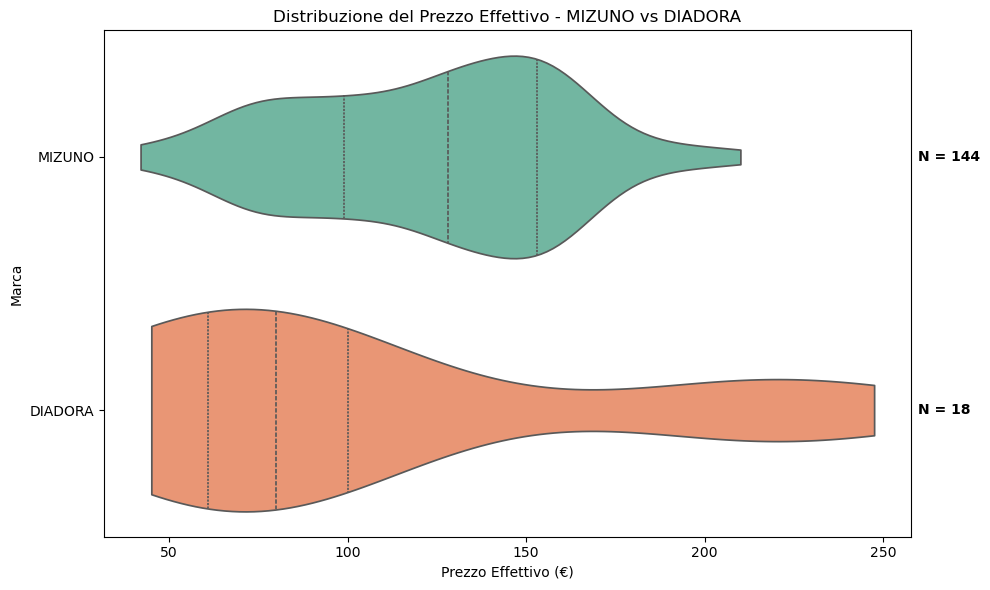

In [47]:
# CAMBIA QUI il nome del competitor che vuoi confrontare
competitor = 'DIADORA'  # oppure 'PUMA', 'JOMA', ecc.

# Filtra i dati
df_confronto = modello_unici[modello_unici['marca'].isin(['MIZUNO', competitor])]

# Ordine fisso
ordine_marche = ['MIZUNO', competitor]

# Calcola numero di modelli per ciascuna marca
conteggi = df_confronto['marca'].value_counts()

# Violin plot orizzontale con hue
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='prezzo_effettivo',  # Prezzo sull'asse X
    y='marca',             # Marca sull'asse Y
    data=df_confronto,
    order=ordine_marche,
    hue='marca',           # Aggiunto hue per differenziare le marche
    palette='Set2',        # Usa una palette di colori per differenziare le marche
    density_norm='width',  # Usa density_norm invece di scale
    cut=0,
    inner='quartile'       # Mostra le bande di quartili
)

# Annotazioni: numero di modelli a destra di ogni violino
for i, marca in enumerate(ordine_marche):
    n = conteggi.get(marca, 0)
    plt.text(df_confronto['prezzo_effettivo'].max() * 1.05, i,  # Posizionato a destra del violino
             f'N = {n}', ha='left', va='center', fontsize=10, fontweight='bold')

# Etichette e titolo
plt.ylabel('Marca')
plt.xlabel('Prezzo Effettivo (€)')
plt.title(f'Distribuzione del Prezzo Effettivo - MIZUNO vs {competitor}')
plt.tight_layout()

# Salva l'immagine come PNG
plt.savefig('grafico_mizuno_vs_diadora.png', dpi=50, bbox_inches='tight')

# Mostra il grafico
plt.show()


### Analisi dei prezzi per comprendere la distribuzione generale dei prezzi di tutti i prodotti. 
### La scelta e di utilizzare un istogramma che e ottima per visualizzare i dati sui prezzi

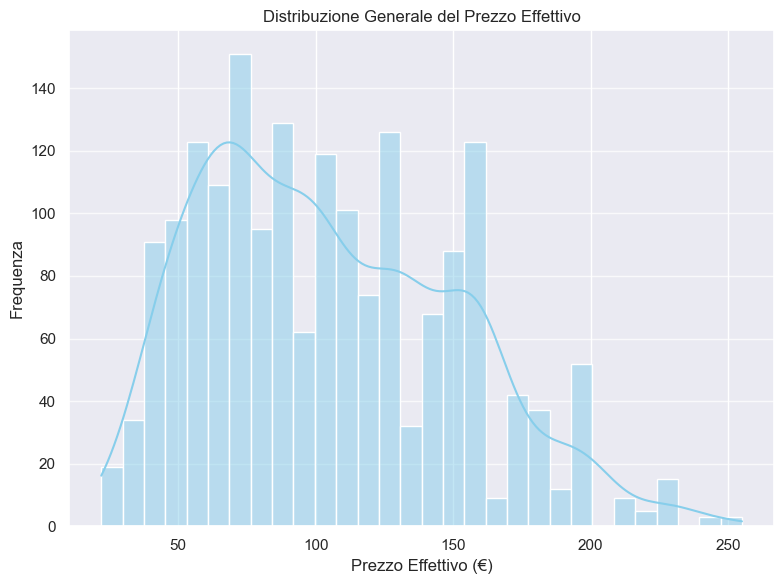

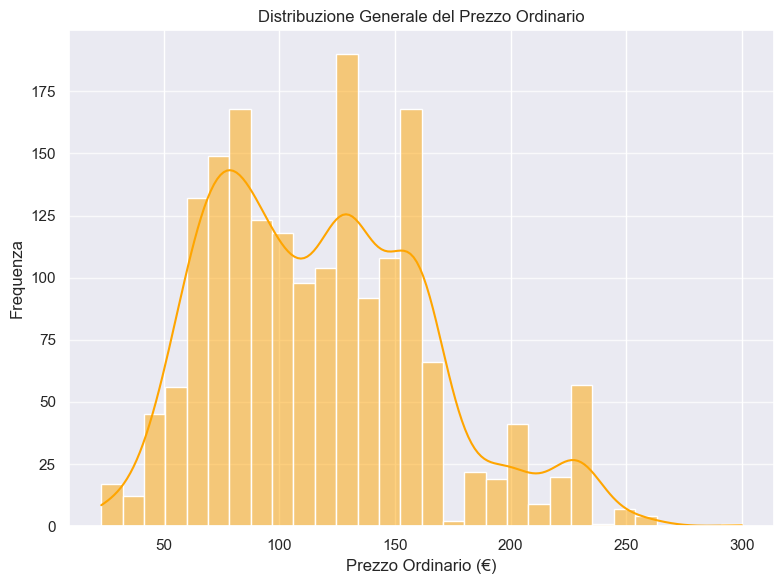

In [83]:
# Creazione dell'istogramma per il prezzo effettivo
plt.figure(figsize=(8, 6))
sns.histplot(modello_unici['prezzo_effettivo'], bins=30, kde=True, color='skyblue')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Effettivo (€)')
plt.ylabel('Frequenza')
plt.title('Distribuzione Generale del Prezzo Effettivo')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Creazione dell'istogramma per il prezzo ordinario
plt.figure(figsize=(8, 6))
sns.histplot(modello_unici['prezzo_ordinario'], bins=30, kde=True, color='orange')

# Aggiunta di etichette e titolo
plt.xlabel('Prezzo Ordinario (€)')
plt.ylabel('Frequenza') # il numero di prodotti che hanno un prezzo all'interno di quell'intervallo
plt.title('Distribuzione Generale del Prezzo Ordinario')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

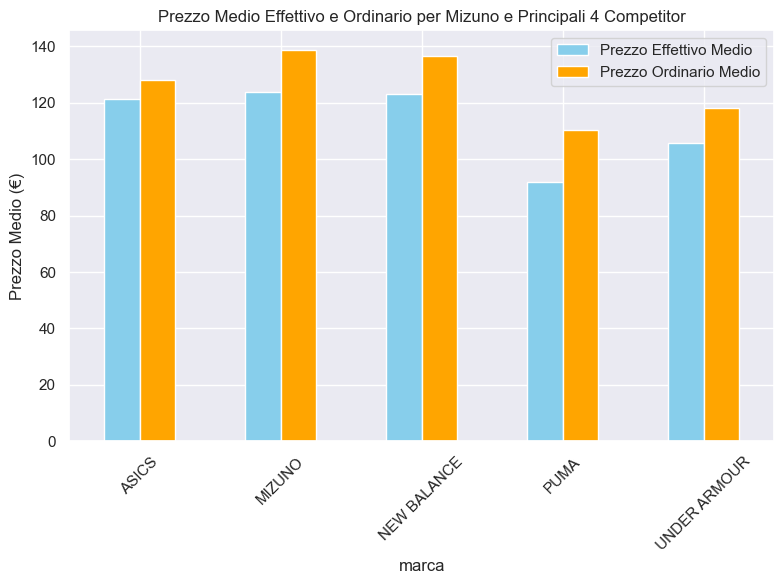

In [79]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = modello_unici['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = modello_unici[modello_unici['marca'].isin(marche_da_analizzare)]

# Calcola il prezzo medio effettivo e ordinario per ogni marca
prezzi_medi_per_marca = df_marche.groupby('marca').agg(
    prezzo_effettivo_medio=('prezzo_effettivo', 'mean'),
    prezzo_ordinario_medio=('prezzo_ordinario', 'mean')
).reset_index()

# Imposta la marca come indice per facilitare il plotting
prezzi_medi_per_marca = prezzi_medi_per_marca.set_index('marca')

# Crea il grafico a barre affiancate
ax = prezzi_medi_per_marca[['prezzo_effettivo_medio', 'prezzo_ordinario_medio']].plot(
    kind='bar',
    figsize=(8, 6),
    color=['skyblue', 'orange'],
    rot=45
)

# Aggiungi etichette e titolo
plt.ylabel('Prezzo Medio (€)')
plt.title('Prezzo Medio Effettivo e Ordinario per Mizuno e Principali 4 Competitor')
plt.legend(['Prezzo Effettivo Medio', 'Prezzo Ordinario Medio'])
plt.tight_layout()
plt.show()

### Analisi dei prezzi Minimi, Massimi e Medi per Modello con l'aiuto di un grafico a barre raggruppante per poter visualizzare le differenze e le tendenze dei prezzi tra i diversi modelli

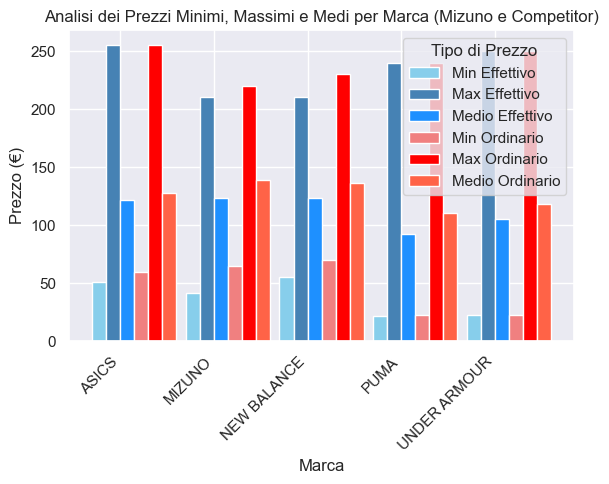

In [77]:
brand = 'MIZUNO'

# Identifica i principali 4 competitor in base al numero di modelli offerti
modelli_per_marca = modello_unici['marca'].value_counts().drop(brand, errors='ignore')
top_4_competitori = modelli_per_marca.nlargest(4).index.tolist()

# Lista delle marche da analizzare
marche_da_analizzare = [brand] + top_4_competitori

# Filtra il DataFrame per le marche selezionate
df_marche = modello_unici[modello_unici['marca'].isin(marche_da_analizzare)]

# Calcolo delle statistiche di prezzo per marca
prezzi_marca = df_marche.groupby('marca').agg(
    prezzo_minimo_effettivo=('prezzo_effettivo', 'min'),
    prezzo_massimo_effettivo=('prezzo_effettivo', 'max'),
    prezzo_medio_effettivo=('prezzo_effettivo', 'mean'),
    prezzo_minimo_ordinario=('prezzo_ordinario', 'min'),
    prezzo_massimo_ordinario=('prezzo_ordinario', 'max'),
    prezzo_medio_ordinario=('prezzo_ordinario', 'mean')
).reset_index()

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(6, 5))

# Larghezza delle barre
bar_width = 0.15

# Posizioni delle barre per ciascuna statistica di prezzo
pos_marca = np.arange(len(prezzi_marca))
pos_min_eff = [p - bar_width * 1.5 for p in pos_marca]
pos_max_eff = [p - bar_width * 0.5 for p in pos_marca]
pos_med_eff = [p + bar_width * 0.5 for p in pos_marca]
pos_min_ord = [p + bar_width * 1.5 for p in pos_marca]
pos_max_ord = [p + bar_width * 2.5 for p in pos_marca]
pos_med_ord = [p + bar_width * 3.5 for p in pos_marca]

# Creazione delle barre per il prezzo effettivo
plt.bar(pos_min_eff, prezzi_marca['prezzo_minimo_effettivo'], bar_width, label='Min Effettivo', color='skyblue')
plt.bar(pos_max_eff, prezzi_marca['prezzo_massimo_effettivo'], bar_width, label='Max Effettivo', color='steelblue')
plt.bar(pos_med_eff, prezzi_marca['prezzo_medio_effettivo'], bar_width, label='Medio Effettivo', color='dodgerblue')

# Creazione delle barre per il prezzo ordinario
plt.bar(pos_min_ord, prezzi_marca['prezzo_minimo_ordinario'], bar_width, label='Min Ordinario', color='lightcoral')
plt.bar(pos_max_ord, prezzi_marca['prezzo_massimo_ordinario'], bar_width, label='Max Ordinario', color='red')
plt.bar(pos_med_ord, prezzi_marca['prezzo_medio_ordinario'], bar_width, label='Medio Ordinario', color='tomato')

# Aggiunta di etichette e titolo
plt.xlabel('Marca')
plt.ylabel('Prezzo (€)')
plt.title('Analisi dei Prezzi Minimi, Massimi e Medi per Marca (Mizuno e Competitor)')
plt.xticks(pos_marca, prezzi_marca['marca'], rotation=45, ha='right')
plt.legend(title='Tipo di Prezzo')
plt.tight_layout()
plt.show()


Prezzi Effettivi Medi per Categoria Sport:
sport
scarpe da golf                             143.599737
stivali da neve                            140.000000
scarpe da calcio con tacchetti             136.371944
scarponi da montagna                       130.000000
scarpe da trail running                    122.522828
scarpa da rugby                            117.500000
scarpa da hiking                           114.588000
scarpe da corsa su strada                  112.583368
scarpe da pallavolo                        109.157024
scarpe da tennis per tutte le superfici    105.906102
scarpe da pallamano                        105.071094
scarpe da calcetto con tacchetti           104.696387
da tennis per terra battuta                100.152131
scarpe da camminata                         94.356667
scarpe da padel                             92.958065
scarpe da basket                            86.243517
scarpe da allenamento                       84.846685
scarpe da calcetto              

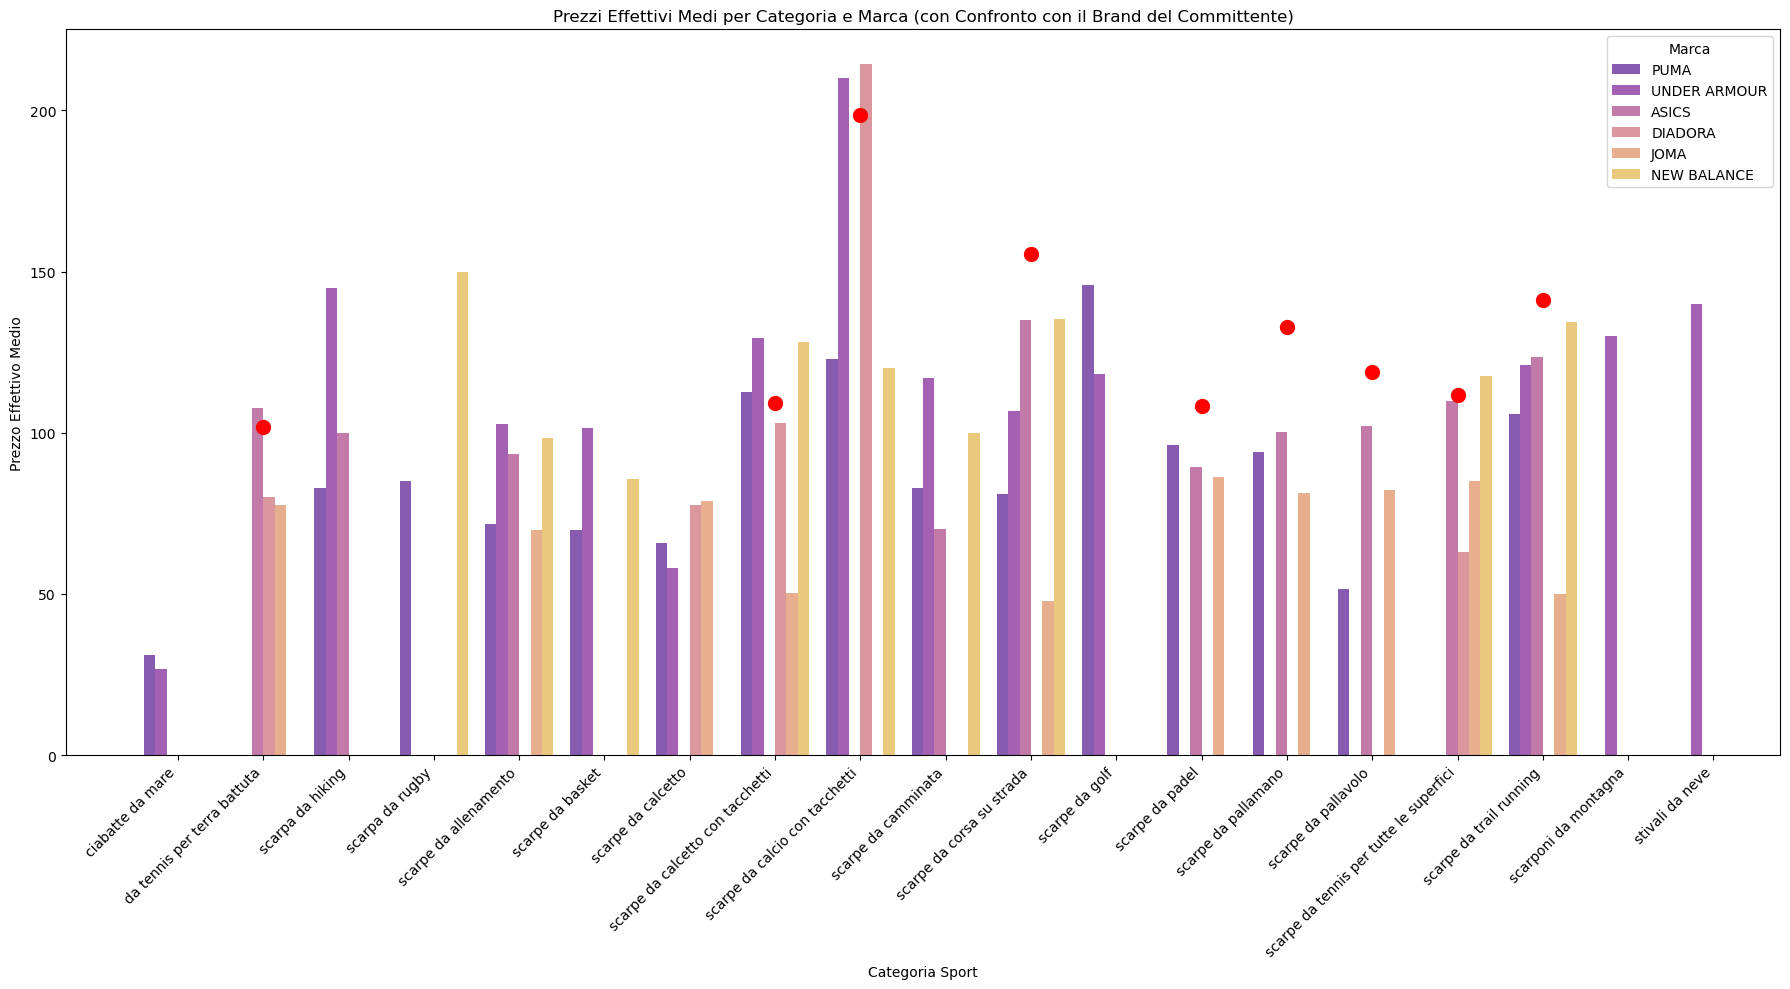


Range di Prezzo Effettivo per Categoria:
                                     sport  prezzo_effettivo
0              da tennis per terra battuta        101.782500
1         scarpe da calcetto con tacchetti        109.110000
2           scarpe da calcio con tacchetti        198.495000
3                scarpe da corsa su strada        155.323333
4                          scarpe da padel        108.190000
5                      scarpe da pallamano        132.686471
6                      scarpe da pallavolo        118.787959
7  scarpe da tennis per tutte le superfici        111.627143
8                  scarpe da trail running        141.067778


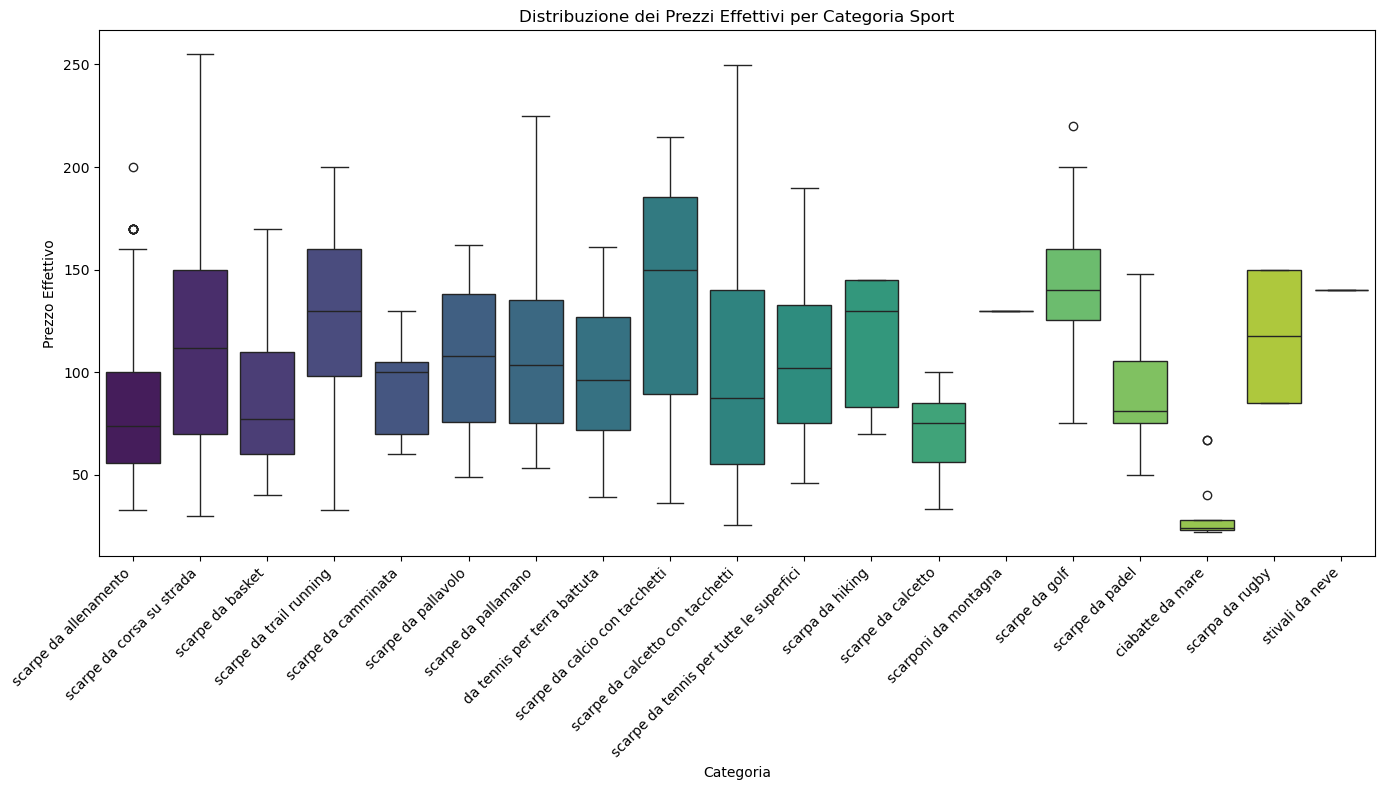

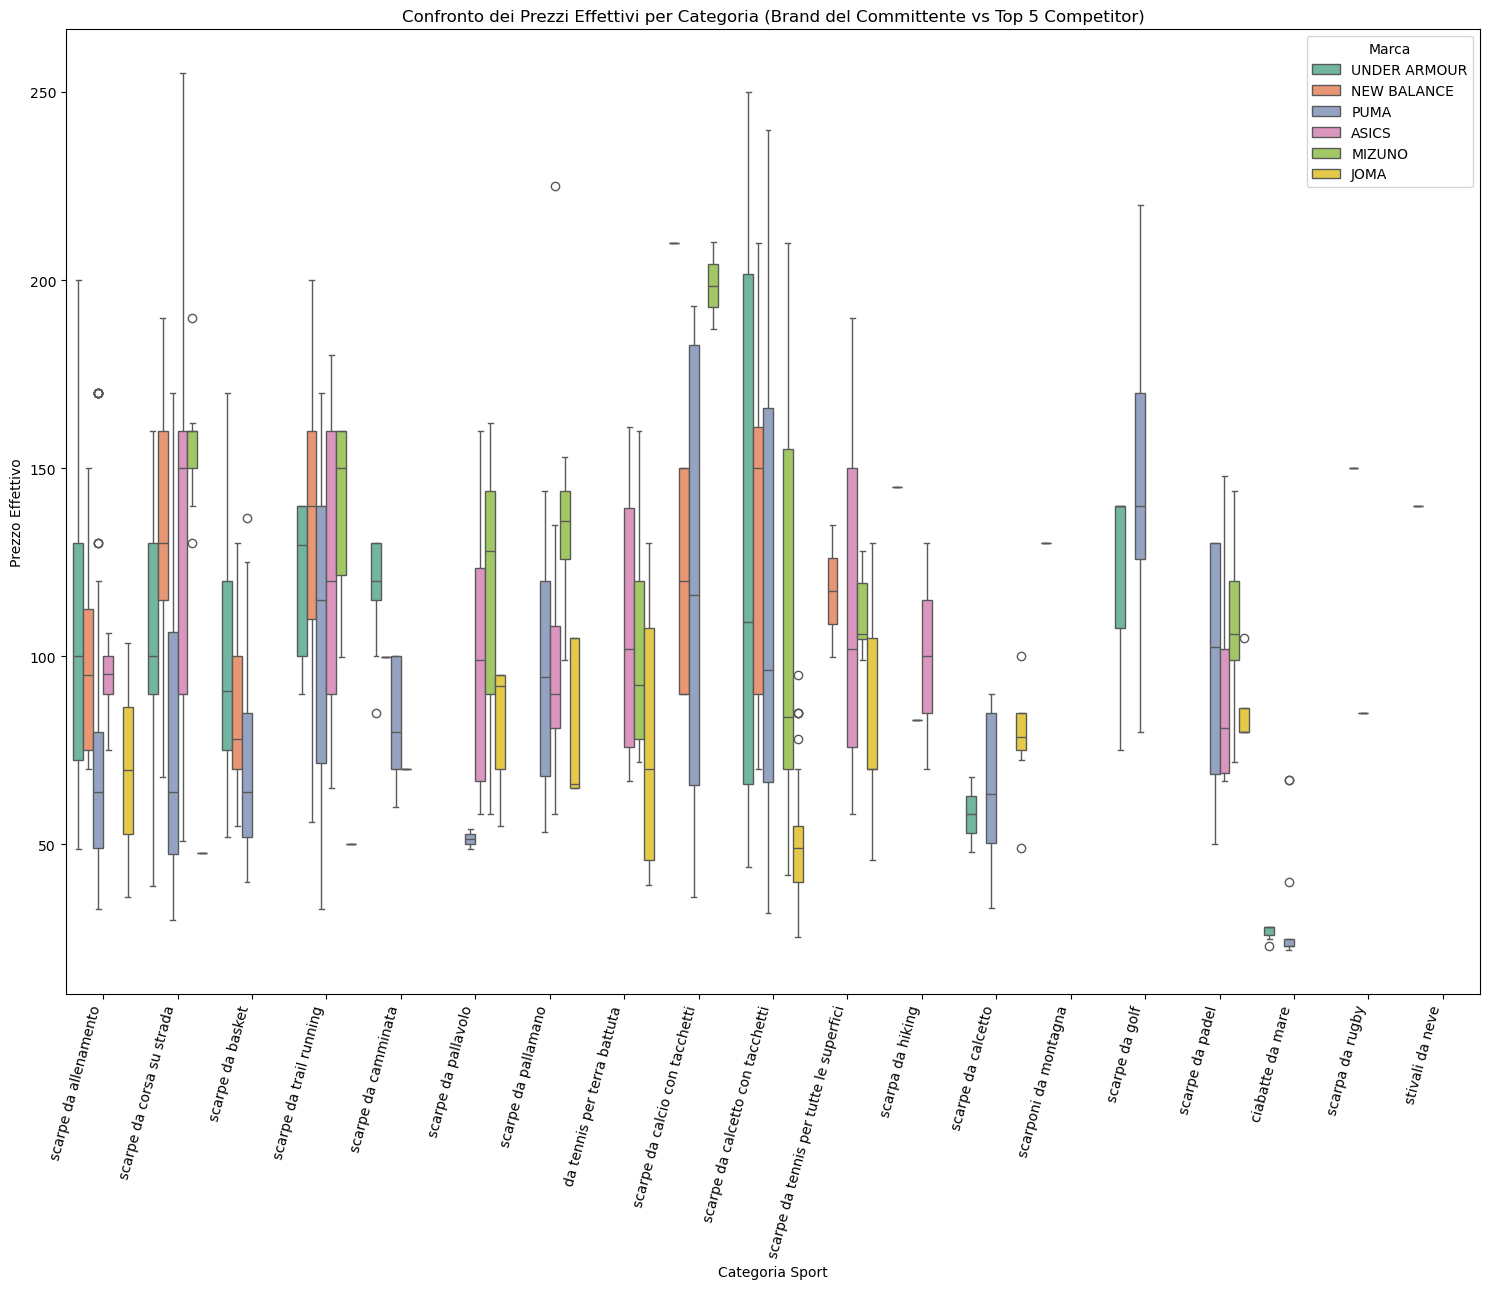

In [53]:
# Prezzi Medi per Categoria
pmc = modello_unici.groupby('sport')['prezzo_effettivo'].mean().sort_values(ascending=False) #prezzo medio per categoria sport
print("\nPrezzi Effettivi Medi per Categoria Sport:")
print(pmc)

# Nome del brand del committente (assicurati che corrisponda esattamente ai dati)
brand = 'MIZUNO'

# 1. Calcola i prezzi medi per categoria e marca (escluso MIZUNO)
pmcb = modello_unici[modello_unici['marca'] != brand].groupby(['sport', 'marca'])['prezzo_effettivo'].mean().reset_index()

# 2. Filtra i dati per il brand del committente
pmM = modello_unici[modello_unici['marca'] == brand].groupby(['sport'])['prezzo_effettivo'].mean().reset_index()

# 3. Visualizzazione Prezzi Medi per Categoria e Marca (confronto)
plt.figure(figsize=(18, 10))
sns.barplot(x='sport', y='prezzo_effettivo', hue='marca', data=pmcb, palette="plasma", alpha=0.7)

# 4. Aggiungi i punti rossi per il brand del committente
if not pmM.empty:
    for index, row in pmM.iterrows():
        plt.scatter(row['sport'], row['prezzo_effettivo'], color='red', marker='o', s=100)

plt.title('Prezzi Effettivi Medi per Categoria e Marca (con Confronto con il Brand del Committente)')
plt.xlabel('Categoria Sport')
plt.ylabel('Prezzo Effettivo Medio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

# Range di Prezzo per Categoria
pmms = modello_unici.groupby('sport')['prezzo_effettivo'].agg(['min', 'max']) #prezzo minimo massimo per categoria sport
print("\nRange di Prezzo Effettivo per Categoria:")
print(pmM)

# Visualizzazione con Boxplot per confrontare le distribuzioni
plt.figure(figsize=(14, 8))
sns.boxplot(x='sport', y='prezzo_effettivo', data=modello_unici, hue='sport', palette="viridis", legend=False)
plt.title('Distribuzione dei Prezzi Effettivi per Categoria Sport')
plt.xlabel('Categoria')
plt.ylabel('Prezzo Effettivo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Confronto Diretto con il Brand del Committente (prezzi per categoria)
plt.figure(figsize=(15, 13))
sns.boxplot(x='sport', y='prezzo_effettivo', hue='marca', data=modello_unici[modello_unici['marca'].isin(['MIZUNO'] + list(modelli_per_marca.nlargest(5).index))], palette="Set2")
plt.title(f'Confronto dei Prezzi Effettivi per Categoria (Brand del Committente vs Top 5 Competitor)')
plt.xlabel('Categoria Sport')
plt.ylabel('Prezzo Effettivo')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Marca')
plt.tight_layout()
plt.show()

Text(70.7222222222222, 0.5, 'Categoria Sport')

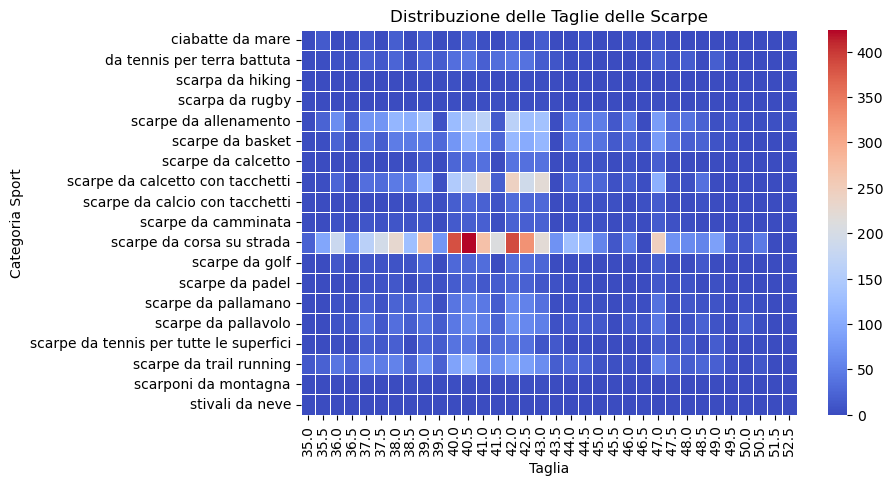

In [54]:
pivot_table = df_esteso.pivot_table(index="sport", columns="taglia", aggfunc="size", fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)

#Etichette
plt.title("Distribuzione delle Taglie delle Scarpe")
plt.xlabel("Taglia")
plt.ylabel("Categoria Sport")

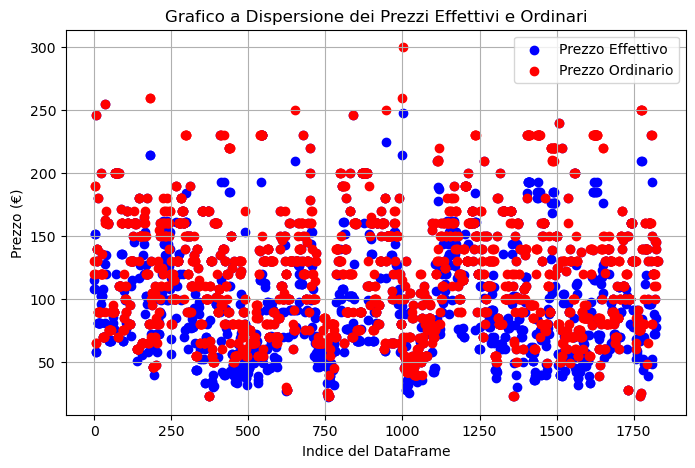

In [55]:
# Crea il grafico a dispersione
plt.figure(figsize=(8, 5))

# Grafico a dispersione per il prezzo effettivo (colore blu)
plt.scatter(modello_unici.index, modello_unici['prezzo_effettivo'], label='Prezzo Effettivo', color='blue')

# Grafico a dispersione per il prezzo ordinario (colore rosso)
plt.scatter(modello_unici.index, modello_unici['prezzo_ordinario'], label='Prezzo Ordinario', color='red')

# Aggiungi etichette e titolo
plt.title('Grafico a Dispersione dei Prezzi Effettivi e Ordinari')
plt.xlabel('Indice del DataFrame')  
plt.ylabel('Prezzo (€)')
plt.legend()  # Mostra la legenda per distinguere i colori
plt.grid(True)
plt.show()

In [56]:
# i primi 5 con piu quantita di prodotti in vendita
nb_shoes = df_esteso['marca'].value_counts().nlargest(5)
nb_shoes


marca
PUMA            5673
ASICS           3179
UNDER ARMOUR    2295
NEW BALANCE     1489
MIZUNO          1089
Name: count, dtype: int64

In [57]:
# i primi 5 con i prezzi di vendita piu alti
price_shoes = modello_unici.groupby('marca')['prezzo_ordinario'].max().nlargest(5)
price_shoes

marca
DIADORA         299.95
ASICS           255.00
UNDER ARMOUR    249.99
PUMA            240.00
NEW BALANCE     230.00
Name: prezzo_ordinario, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18748\980470849.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


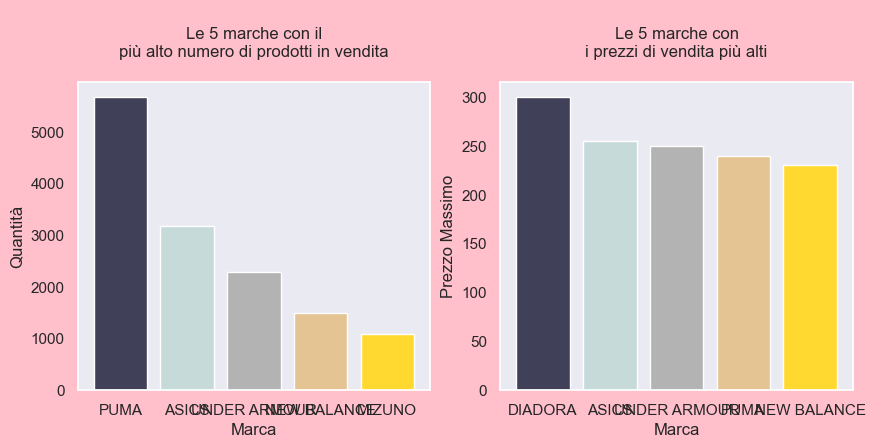

In [58]:
#Definiamo i colori
c_1, c_2 = sns.color_palette('bone')[1], sns.color_palette('bone', 5)[-1]
c_3, c_4 = sns.color_palette('Set2')[-1], sns.color_palette('Set2')[-2]
c_5 = sns.color_palette('Set2')[-3]
colors = [c_1, c_2, c_3, c_4, c_5]
#Crea il graffico
sns.set_theme(style='dark')
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#Grafico per i prezzi di vendita più alti
ax1.bar(data=nb_shoes, x=nb_shoes.index, height=nb_shoes.values, color=colors)
ax1.set_ylabel('Quantità')
ax1.set_xlabel('Marca')
ax1.set_title('\nLe 5 marche con il\npiù alto numero di prodotti in vendita\n')
# Grafico per i prezzi di vendita più alti
ax2.bar(data=price_shoes, x=price_shoes.index, height=price_shoes.values, color=colors)
ax2.set_title('\nLe 5 marche con\ni prezzi di vendita più alti\n')
ax2.set_ylabel('Prezzo Massimo')
ax2.set_xlabel('Marca')
#Imposta il colore di sfondo della figura
fig.set_facecolor(color='#FFC0CB')
# mostra il graffico
fig.show()

In [59]:
modello_unici


,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,sport,colori_split,numero_taglie
798,unisex,UNDER ARMOUR,reign lifter unisex - scarpe da allenamento - ...,199.99,199.99,reign lifter unisex,scarpe da allenamento,black/white,22
579,donna,UNDER ARMOUR,apparition - scarpe da allenamento - white/cas...,90.99,129.99,apparition,scarpe da allenamento,white/castlerock/ares red,19
676,donna,UNDER ARMOUR,scarpe da corsa su strada - white,130.00,130.00,unknown,scarpe da corsa su strada,white,19
711,unisex,NEW BALANCE,480 unisex - scarpe da basket - dark mushroom,99.99,99.99,480 unisex,scarpe da basket,dark mushroom,19
741,unisex,PUMA,cell thrill unisex - scarpe da allenamento - b...,64.99,64.99,cell thrill unisex,scarpe da allenamento,black black,19
...,...,...,...,...,...,...,...,...,...
1633,uomo,PUMA,ultra match fg/ag - scarpe da calcetto con tac...,71.37,84.95,ultra match fg/ag,scarpe da calcetto con tacchetti,black/asphalt,1
1324,uomo,PUMA,deviate nitro - scarpe da corsa su strada - bl...,170.00,170.00,deviate nitro,scarpe da corsa su strada,black sun stream,1
1641,uomo,PUMA,ultra match mg - scarpe da calcetto con tacche...,47.50,47.50,ultra match mg,scarpe da calcetto con tacchetti,poison pink/white/black,1
1642,uomo,PUMA,ultra match tt - scarpe da calcetto con tacche...,71.37,84.95,ultra match tt,scarpe da calcetto con tacchetti,black/asphalt,1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18748\427708114.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=analisa, x='marca', y='prezzo_effettivo', palette=my_pltt)


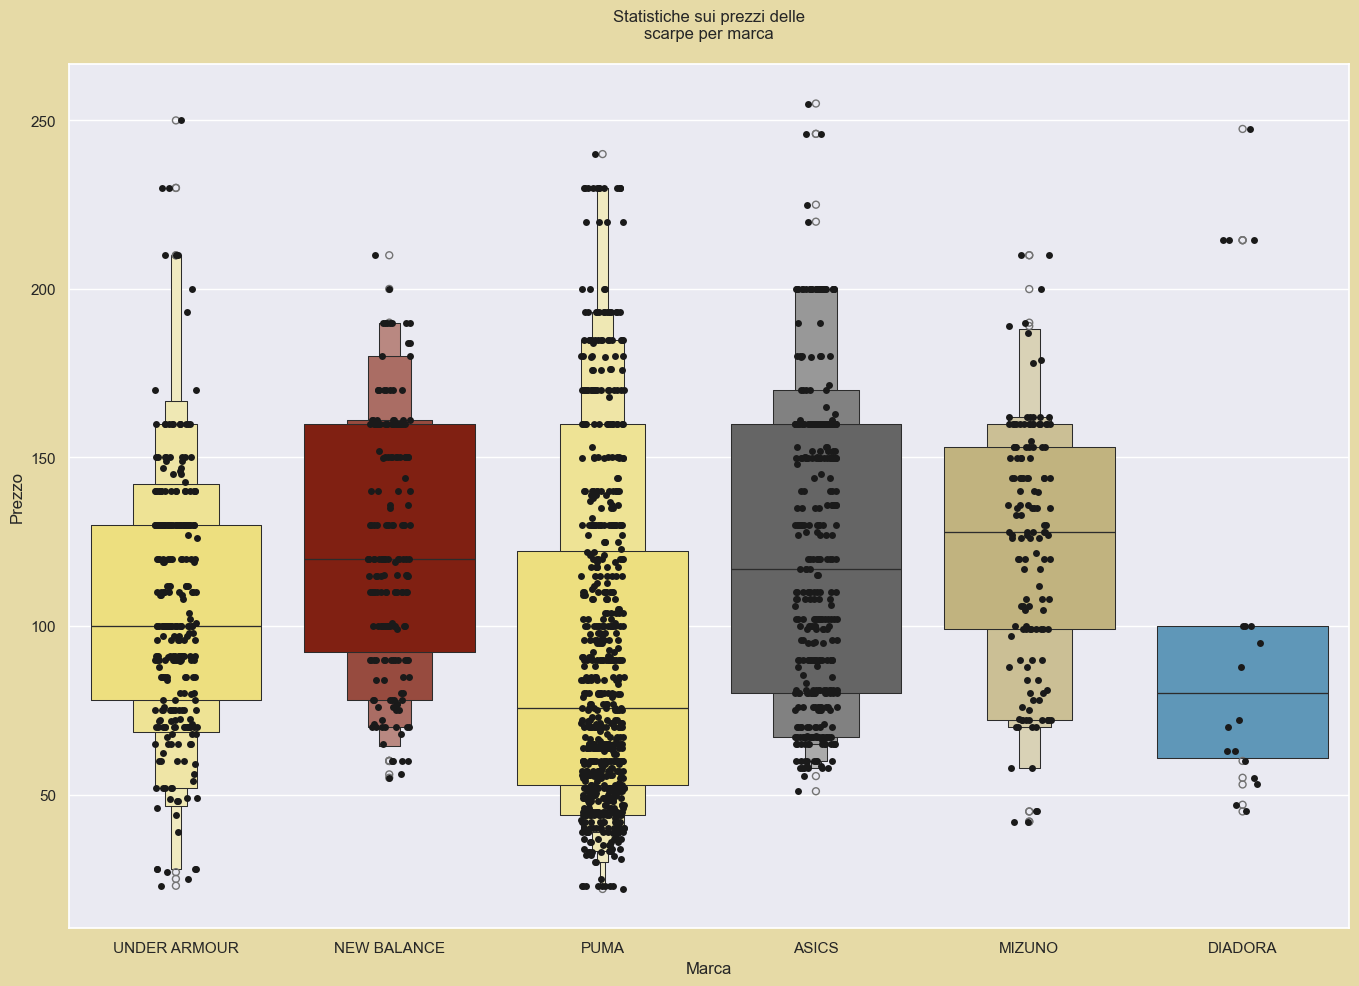

In [60]:
# definiamo i brand d'interesse
brands = list(price_shoes.index)
brands.append('MIZUNO')

# filtriamo per i brand s'interesse
analisa = modello_unici[modello_unici['marca'].isin(brands)]

# definiamo le palette di colori
c_1, c_2 = sns.color_palette('PuBu')[-3], sns.color_palette('afmhot')[-2]
c_3, c_4 = sns.color_palette('afmhot')[1], sns.color_palette('afmhot')[-2]
c_5 = sns.color_palette('RdGy')[-1]

# facciamo i dizionari delle palette
my_pltt = {x: 'y' for x in analisa['marca'].unique()}
my_pltt['DIADORA'], my_pltt['PUMA'], my_pltt['ASICS'] = c_1, c_2, c_5
my_pltt['UNDER ARMOUR'], my_pltt['NEW BALANCE'] = c_4, c_3

# facciamo il grafico
sns.set_theme(style='darkgrid')
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1.8])

# boxenplot
sns.boxenplot(data=analisa, x='marca', y='prezzo_effettivo', palette=my_pltt)

# stripplot
sns.stripplot(data=analisa, x='marca', y='prezzo_effettivo', color='k')

# impostiamo le etichette al titolo
axes.set_ylabel('Prezzo')
axes.set_xlabel('Marca')
axes.set_title('Statistiche sui prezzi delle\nscarpe per marca\n')

# impostiamo lo sfondo
fig.set_facecolor(color='#E6DAA6')

# mostra il grafico
plt.show()

In [61]:
#Statistics data
statistics_table = modello_unici.pivot_table(index='marca', values='prezzo_effettivo', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['marca', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, len(statistics_table) + 1)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)
print('\nStatistics table:')
print(statistics_table)


Statistics table:
          marca     Max    Mean  Median    Min
1        MIZUNO  210.00  123.68  127.99  41.99
2   NEW BALANCE  209.99  123.02  119.99  54.99
3         ASICS  255.00  121.33  116.99  50.99
4  UNDER ARMOUR  249.99  105.68  100.00  22.95
5       DIADORA  247.46  105.64   79.99  45.00
6          PUMA  240.00   92.04   75.56  22.00
7          JOMA  129.99   65.09   55.00  25.39


In [62]:
#Statistics data
statistics_table = modello_unici.pivot_table(index='marca', values='prezzo_ordinario', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['marca', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, len(statistics_table) + 1)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)
print('\nStatistics table:')
print(statistics_table)


Statistics table:
          marca     Max    Mean  Median    Min
1        MIZUNO  219.99  138.66  149.99  64.99
2         ASICS  255.00  127.87  129.99  59.99
3   NEW BALANCE  230.00  136.35  129.99  69.99
4  UNDER ARMOUR  249.99  118.27  129.99  22.95
5          PUMA  240.00  110.21   94.99  23.00
6       DIADORA  299.95  120.15   89.99  45.00
7          JOMA  129.99   68.97   59.99  39.99


In [63]:
#Statistics data
statistics_table = df_esteso.pivot_table(index='marca', values='taglia', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['marca', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, len(statistics_table) + 1)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)
print('\nStatistics table:')
print(statistics_table)


Statistics table:
          marca   Max   Mean  Median   Min
1       DIADORA  47.0  42.11    42.0  36.5
2        MIZUNO  50.0  42.15    42.0  36.0
3  UNDER ARMOUR  52.5  41.83    42.0  35.5
4         ASICS  51.5  41.74    41.5  35.5
5   NEW BALANCE  50.0  41.27    41.5  35.0
6          JOMA  47.0  41.17    41.0  36.0
7          PUMA  49.5  41.35    41.0  35.5


In [64]:
df_esteso

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori_split
0,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,white
1,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,warm white
2,Scarpe Sportive,35.5,uomo,PUMA,morphic - scarpe da corsa su strada - white-wa...,47.95,80.00,https://www.zalando.it/puma-morphic-sneakers-b...,morphic,scarpe da corsa su strada,sun struck
3,Scarpe Sportive,35.5,unisex,PUMA,prospect unisex - scarpe da allenamento - blac...,48.95,70.00,https://www.zalando.it/puma-prospect-unisex-sc...,prospect unisex,scarpe da allenamento,black/yellow alert/white
4,Scarpe Sportive,35.5,unisex,PUMA,pwr hybrid tr unisex - scarpe da allenamento -...,63.95,80.00,https://www.zalando.it/puma-pwr-hybrid-tr-unis...,pwr hybrid tr unisex,scarpe da allenamento,black
...,...,...,...,...,...,...,...,...,...,...,...
14224,Scarpe Sportive,47.0,donna,UNDER ARMOUR,scarpe da corsa su strada - white,130.00,130.00,https://www.zalando.it/under-armour-scarpe-da-...,unknown,scarpe da corsa su strada,white
14225,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - white/black,89.99,89.99,https://www.zalando.it/puma-unisex-scarpe-da-p...,unknown,scarpe da allenamento,white/black
14226,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - sun stream black caram...,89.99,89.99,https://www.zalando.it/puma-scarpe-da-allename...,unknown,scarpe da allenamento,sun stream black caramel latte
14227,Scarpe Sportive,48.0,donna,PUMA,scarpe da allenamento - black/white,89.99,89.99,https://www.zalando.it/puma-scarpe-da-pallaman...,unknown,scarpe da allenamento,black/white


## HeatMap taglie per sport solo Mizuno 

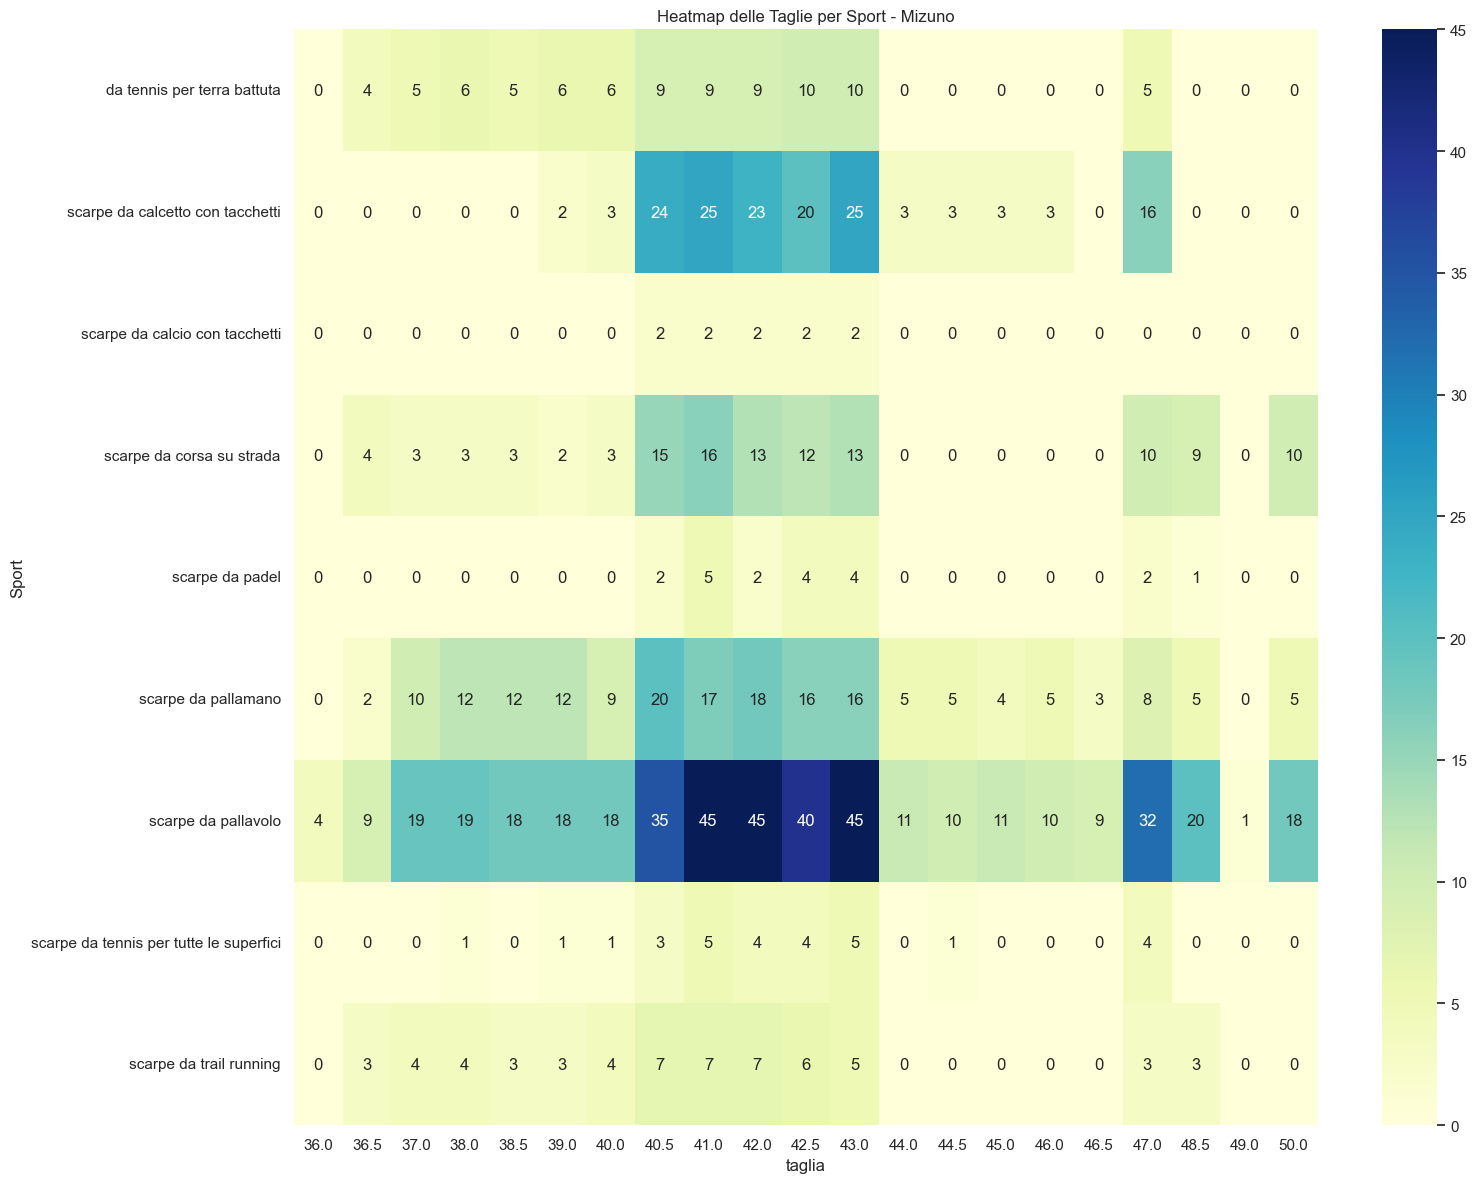

In [66]:
# 1. Filtra i dati per Mizuno
df_mizuno = df_esteso[df_esteso['marca'] == 'MIZUNO']

# 2. Crea una tabella di contingenza (frequenza per taglia e sport)
# Supponiamo che le colonne siano 'sport' e 'taglia'
contingenza_taglie = pd.crosstab(df_mizuno['sport'], df_mizuno['taglia'])

# 3. Crea la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(contingenza_taglie, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# 4. Aggiungi etichette e titolo
plt.title('Heatmap delle Taglie per Sport - Mizuno')
plt.xlabel('taglia')
plt.ylabel('Sport')

# 5. Visualizza il grafico
plt.tight_layout()
plt.show()


In [67]:
df_mizuno

,categoria,taglia,genere,marca,nome_prodotto,prezzo_effettivo,prezzo_ordinario,url_prodotto,modello,sport,colori_split
94,Scarpe Sportive,37.0,unisex,MIZUNO,wave phantom 3 unisex - scarpe da pallamano - ...,98.99,109.99,https://www.zalando.it/mizuno-wave-phantom-3-u...,wave phantom 3 unisex,scarpe da pallamano,mint/black/blue
98,Scarpe Sportive,37.0,unisex,MIZUNO,wave mirage 5 unisex - scarpe da pallamano - m...,127.99,159.99,https://www.zalando.it/mizuno-sneakers-basse-m...,wave mirage 5 unisex,scarpe da pallamano,mint/black/blue
102,Scarpe Sportive,37.0,uomo,MIZUNO,wave lightning neo 3 - scarpe da pallavolo - m...,161.99,179.99,https://www.zalando.it/mizuno-wave-lightning-n...,wave lightning neo 3,scarpe da pallavolo,mint/black/blue
107,Scarpe Sportive,37.0,uomo,MIZUNO,wave luminous 3 - scarpe da pallavolo - mint/b...,134.99,149.99,https://www.zalando.it/mizuno-wave-luminous-3-...,wave luminous 3,scarpe da pallavolo,mint/black/blue
111,Scarpe Sportive,37.0,unisex,MIZUNO,wave stealth 6 unisex - scarpe da pallamano - ...,125.99,139.99,https://www.zalando.it/mizuno-sneakers-basse-n...,wave stealth 6 unisex,scarpe da pallamano,neo mint/black/frontier blue
...,...,...,...,...,...,...,...,...,...,...,...
14052,Scarpe Sportive,50.0,donna,MIZUNO,thunder blade z - scarpe da pallavolo - black/...,71.99,79.99,https://www.zalando.it/mizuno-thunder-blade-z-...,thunder blade z,scarpe da pallavolo,black/neon flame/peacock blue
14053,Scarpe Sportive,50.0,donna,MIZUNO,wave lightning z8 - scarpe da pallavolo - blac...,127.99,159.99,https://www.zalando.it/mizuno-wave-lightning-z...,wave lightning z8,scarpe da pallavolo,black/neon flame/peacock blue
14054,Scarpe Sportive,50.0,donna,MIZUNO,wave lightning z8 - scarpe da pallavolo - whit...,143.99,159.99,https://www.zalando.it/mizuno-wave-lightning-z...,wave lightning z8,scarpe da pallavolo,white/bellwether blue/bel air blue
14084,Scarpe Sportive,38.0,donna,MIZUNO,scarpe da tennis per tutte le superfici - rive...,104.72,125.00,https://www.zalando.it/mizuno-scarpe-da-tennis...,unknown,scarpe da tennis per tutte le superfici,riverblue white mugenblue


In [68]:
print("\nValori Unici per Colonne Categoriche:")
for col in ['marca', 'categoria', 'taglia', 'genere', 'modello', 'sport']:
    print(f"{col}: {df_mizuno[col].nunique()} valori unici")


Valori Unici per Colonne Categoriche:
marca: 1 valori unici
categoria: 1 valori unici
taglia: 21 valori unici
genere: 3 valori unici
modello: 72 valori unici
sport: 9 valori unici


## CONFRONTO TAGLIE MIZUNO VS UNDER ARMOUR

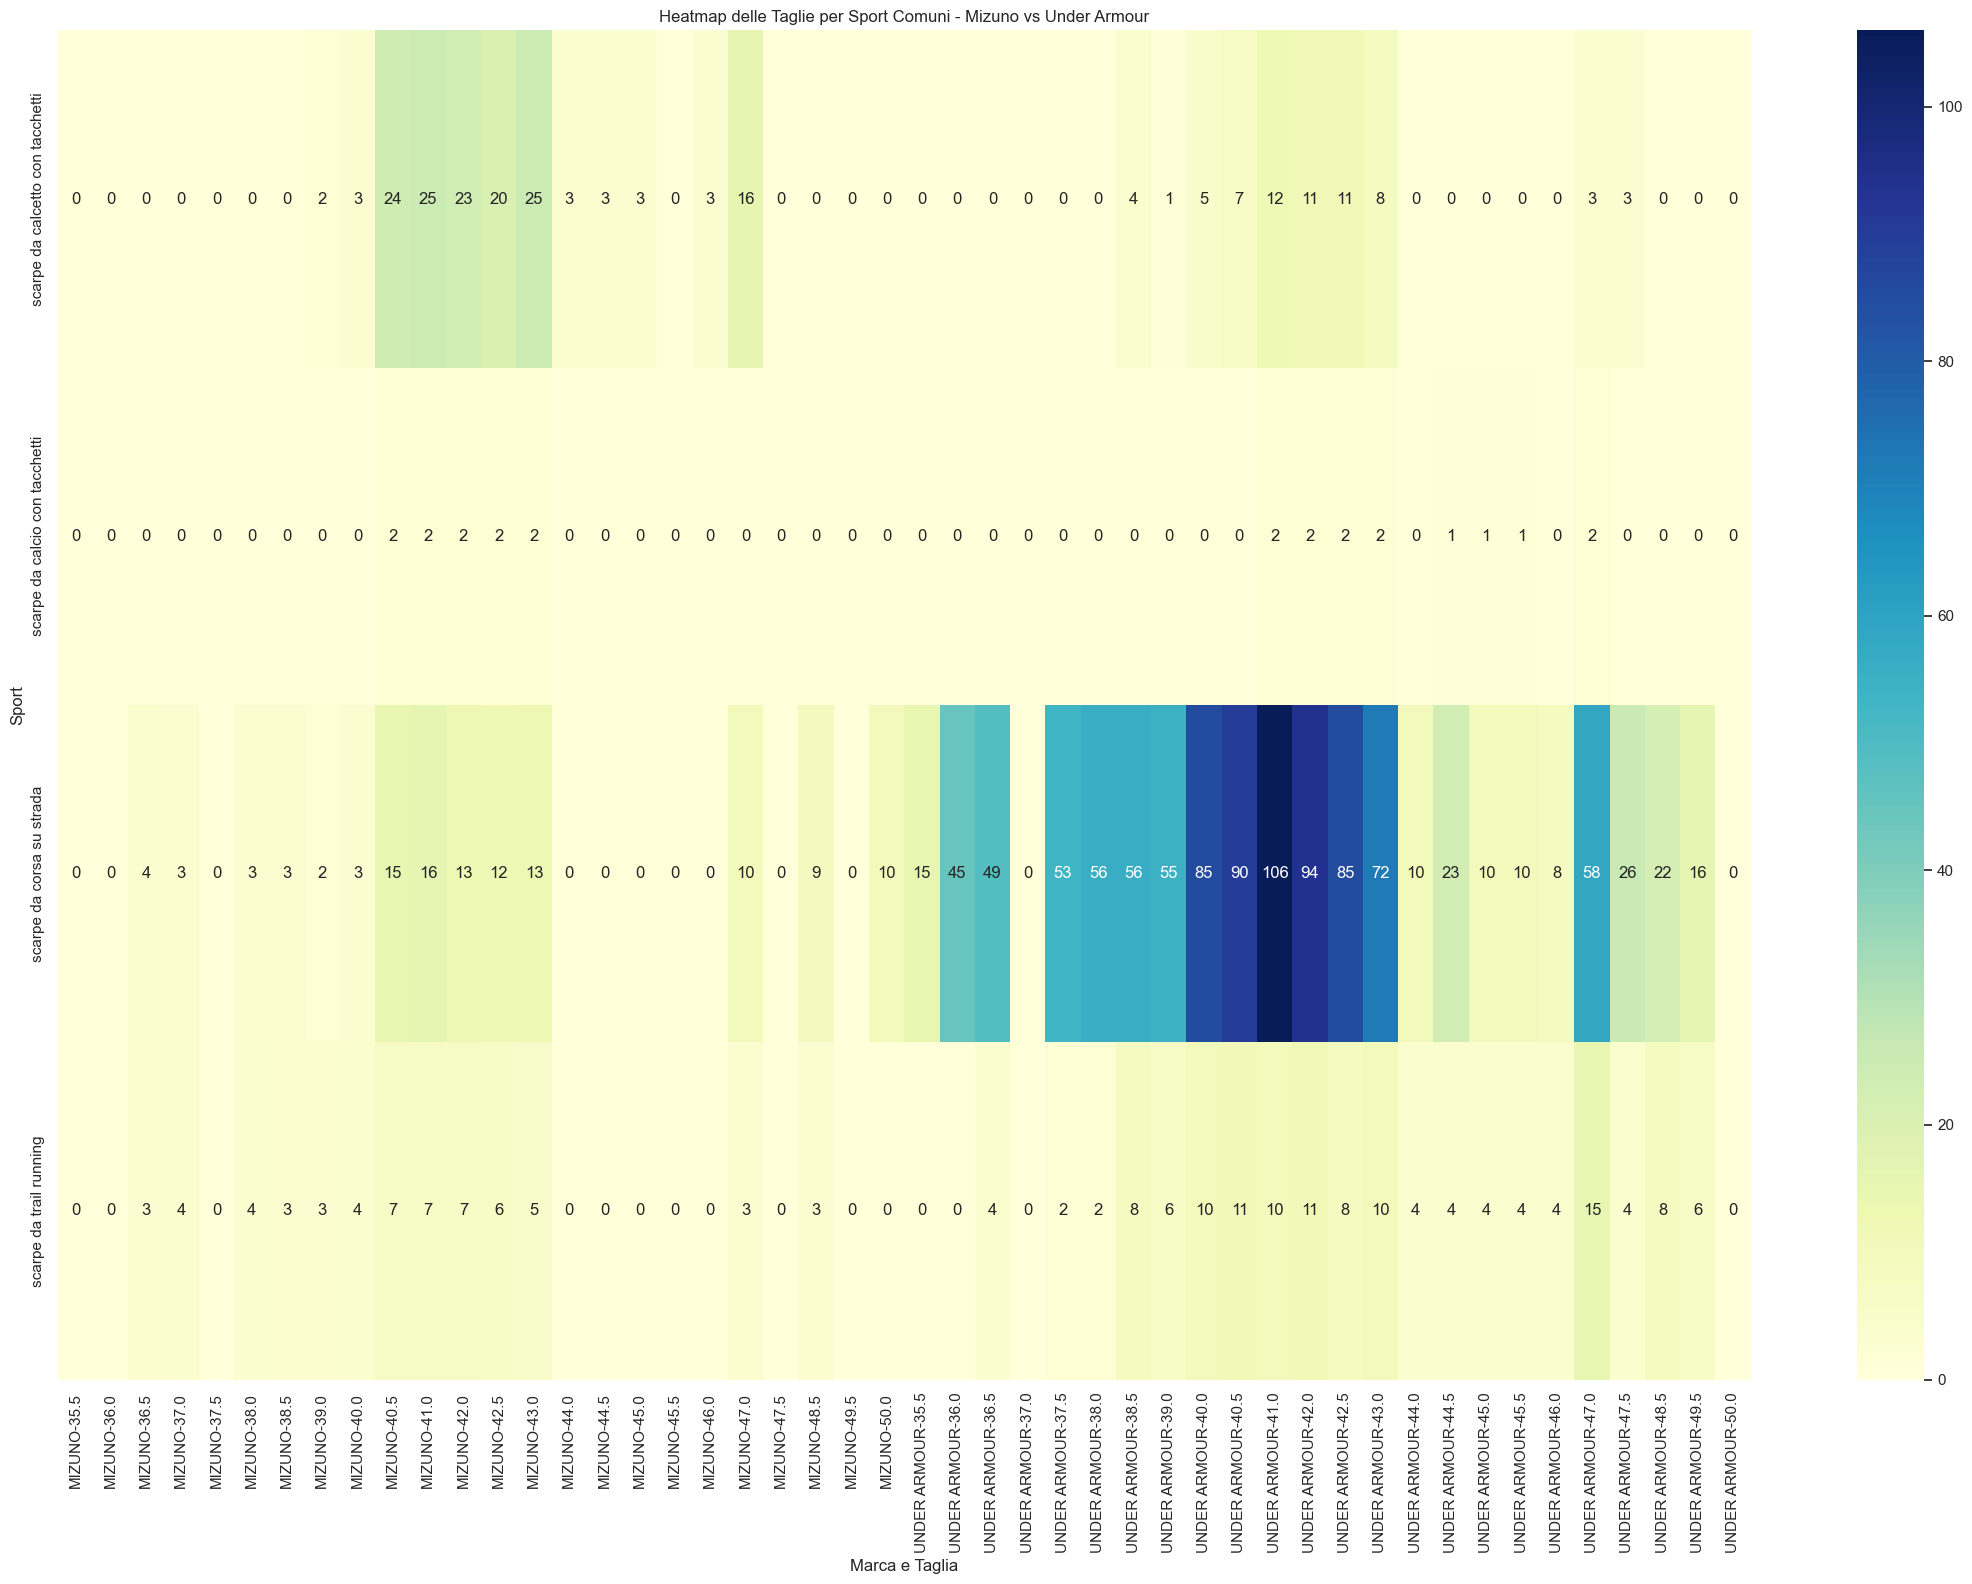

In [73]:
# 1. Filtra i dati per Mizuno e Under Armour
df_mizuno = df_esteso[df_esteso['marca'] == 'MIZUNO']
df_under_armour = df_esteso[df_esteso['marca'] == 'UNDER ARMOUR']

# 2. Trova gli sport che sono comuni tra Mizuno e Under Armour
sport_mizuno = set(df_mizuno['sport'].unique())  # Gli sport per Mizuno
sport_under_armour = set(df_under_armour['sport'].unique())  # Gli sport per Under Armour

# 3. Trova l'intersezione (sport comuni)
sport_comuni = sport_mizuno.intersection(sport_under_armour)

# 4. Filtra i dati per includere solo gli sport comuni
df_mizuno_comuni = df_mizuno[df_mizuno['sport'].isin(sport_comuni)]
df_under_armour_comuni = df_under_armour[df_under_armour['sport'].isin(sport_comuni)]

# 5. Unisci i due dataframe per le righe con sport comuni
df_combinato_comuni = pd.concat([df_mizuno_comuni, df_under_armour_comuni])

# 6. Crea una tabella di contingenza (frequenza per taglia e sport) separando per marca
contingenza_taglie_comuni = pd.crosstab([df_combinato_comuni['sport']], [df_combinato_comuni['marca'], df_combinato_comuni['taglia']], 
                                        dropna=False)

# 7. Crea la heatmap
plt.figure(figsize=(22, 16))
sns.heatmap(contingenza_taglie_comuni, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# 8. Aggiungi etichette e titolo
plt.title('Heatmap delle Taglie per Sport Comuni - Mizuno vs Under Armour')
plt.xlabel('Marca e Taglia')
plt.ylabel('Sport')

# 9. Visualizza il grafico
plt.tight_layout()
plt.show()


In [ ]:
# 1. Filtra i dati per Mizuno e Under Armour
df_mizuno = df_esteso[df_esteso['marca'] == 'MIZUNO']
df_under_armour = df_esteso[df_esteso['marca'] == 'UNDER ARMOUR']

# 2. Trova gli sport che sono comuni tra Mizuno e Under Armour
sport_mizuno = set(df_mizuno['sport'].unique())  # Gli sport per Mizuno
sport_under_armour = set(df_under_armour['sport'].unique())  # Gli sport per Under Armour

# 3. Trova l'intersezione (sport comuni)
sport_comuni = sport_mizuno.intersection(sport_under_armour)

# 4. Filtra i dati per includere solo gli sport comuni
df_mizuno_comuni = df_mizuno[df_mizuno['sport'].isin(sport_comuni)]
df_under_armour_comuni = df_under_armour[df_under_armour['sport'].isin(sport_comuni)]

# 5. Unisci i due dataframe per le righe con sport comuni
df_combinato_comuni = pd.concat([df_mizuno_comuni, df_under_armour_comuni])

# 6. Crea una tabella di contingenza (frequenza per taglia e sport) separando per marca
# Raggruppiamo solo per taglia e sport, ma non per marca nelle colonne
contingenza_taglie_comuni = pd.crosstab(
    df_combinato_comuni['sport'], 
    [df_combinato_comuni['taglia'], df_combinato_comuni['marca']], 
    dropna=False
)

# 7. Crea la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(contingenza_taglie_comuni, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# 8. Aggiungi etichette e titolo
plt.title('Heatmap delle Taglie per Sport Comuni - Mizuno vs Under Armour')
plt.xlabel('Taglia e Marca')
plt.ylabel('Sport')

# 9. Visualizza il grafico
plt.tight_layout()
plt.show()


## Grafico a radar spider chart per taglie e colori tra uomo e donna 

Contingenza Uomo:
 genere  uomo
taglia      
35.5       9
36.0      17
36.5       3
37.0      51
38.0      80
38.5      77
39.0     259
39.5      21
40.0     474
40.5     696
41.0     583
41.5     252
42.0     775
42.5     678
43.0     633
47.0     563
47.5     147
48.0     148
48.5     173
49.0     161
49.5      26
50.0      31
50.5      64
51.5       1

Contingenza Donna:
 genere  donna
taglia       
35.0       33
35.5      129
36.0      316
36.5      128
37.0      349
37.5      396
38.0      448
38.5      235
39.0      472
39.5      151
40.0      509
40.5      493
41.0      361
41.5      196
42.0      465
42.5      364
43.0      226
43.5      124
44.0      249
44.5      234
45.0      142
45.5       33
46.0      117
46.5       23
47.0      103
47.5       18
48.0       14
48.5       12
49.5        2
50.0        4
50.5        1


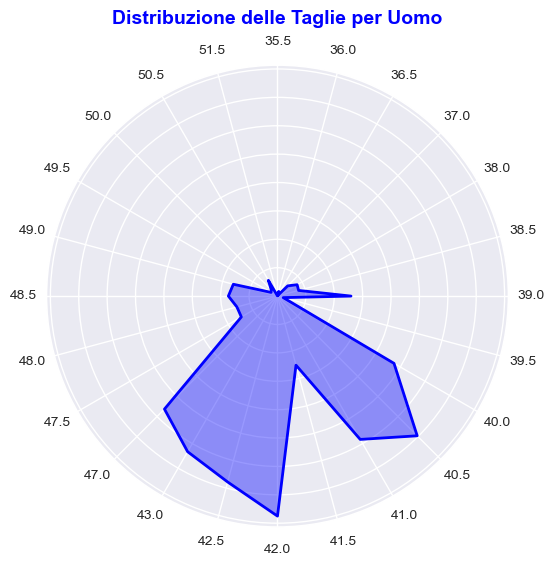

Errore: La colonna 'uomo' non esiste, tentando con MultiIndex


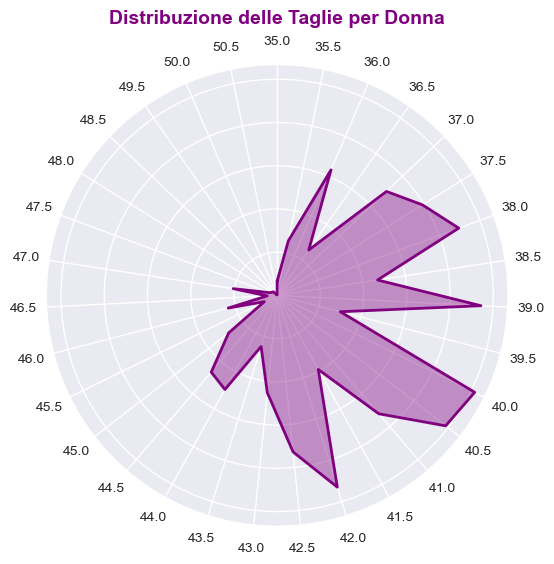

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi

# 1. Filtra i dati per uomo e donna
df_uomo = df_esteso[df_esteso['genere'] == 'uomo']
df_donna = df_esteso[df_esteso['genere'] == 'donna']

# 2. Crea una tabella di contingenza per le taglie separato per sesso
# Creiamo il contesto per le taglie per uomo e donna separatamente
contingenza_uomo_taglia = pd.crosstab(df_uomo['taglia'], df_uomo['genere']).fillna(0)
contingenza_donna_taglia = pd.crosstab(df_donna['taglia'], df_donna['genere']).fillna(0)

# Verifica la struttura della tabella di contingenza
print("Contingenza Uomo:\n", contingenza_uomo_taglia)
print("\nContingenza Donna:\n", contingenza_donna_taglia)

# 3. Creazione di un grafico a radar
def radar_chart(data, title, color):
    # Numero di variabili (taglie)
    categories = list(data.index)  # Ora si accede all'indice (taglie)
    N = len(categories)
    
    # Impostazioni dell'angolo per ogni categoria
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Per chiudere il grafico
    
    # Creare il grafico
    fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))
    
    # Se i dati sono in un formato MultiIndex, dobbiamo modificare questa parte per accedere ai dati
    try:
        values = data['uomo'].tolist()  # Accediamo ai dati per "uomo"
    except KeyError:
        print("Errore: La colonna 'uomo' non esiste, tentando con MultiIndex")
        values = data.iloc[:, 0].tolist()  # Se c'è un MultiIndex, proviamo con il primo livello
    
    values += values[:1]
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Traccia la linea del radar
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    
    # Riempi l'area sotto la curva
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Etichette delle categorie (taglie)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    
    # Titolo
    ax.set_title(title, size=14, color=color, fontweight='bold', va='bottom')
    
    # Mostra il grafico
    plt.show()

# 4. Creare grafici per uomo e donna separatamente (taglie)
# Radar chart per Uomo (Taglie)
radar_chart(contingenza_uomo_taglia, 'Distribuzione delle Taglie per Uomo', color='blue')

# Radar chart per Donna (Taglie)
radar_chart(contingenza_donna_taglia, 'Distribuzione delle Taglie per Donna', color='purple')


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Filtra i dati per uomo e donna
df_uomo = df_esteso[df_esteso['genere'] == 'uomo']
df_donna = df_esteso[df_esteso['genere'] == 'donna']

# 2. Crea tabelle di frequenza per i colori
freq_uomo = df_uomo['colori_split'].value_counts().head(25)
freq_donna = df_donna['colori_split'].value_counts().head(25)

# 3. Creazione di un grafico a barre orizzontali
def bar_chart(data, title, color):
    # Creare il grafico a barre orizzontali
    fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
    
    # Traccia le barre orizzontali (i colori sono già sull'asse y con barh)
    bars = ax.barh(data.index, data.values, color=color)
    
    # Aggiungi i valori sulle barre
    ax.bar_label(bars, padding=3, fmt='%d')
    
    # Etichette e titolo
    ax.set_xlabel('Frequenza', fontsize=12)
    ax.set_ylabel('Colori', fontsize=12)
    ax.set_title(title, fontsize=14, pad=20)
    
    # Migliora la leggibilità
    plt.tight_layout()
    plt.show()

# 4. Creare grafici per uomo e donna separatamente
# Grafico a barre orizzontali per Uomo (Top 25 colori)
bar_chart(freq_uomo, 'Top 25 Colori preferiti - Uomini', color='dodgerblue')

# Grafico a barre orizzontali per Donna (Top 25 colori)
bar_chart(freq_donna, 'Top 25 Colori preferiti - Donne', color='orchid')

## Distribuzione del Numero di Modelli per Categoria di Sport percentuale

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supponiamo che df_esteso sia il tuo DataFrame
# Calcolare la distribuzione percentuale del numero di modelli per categoria di sport
distribuzione_percentuale = df_esteso['sport'].value_counts(normalize=True) * 100

# Ordinare per frequenza decrescente
distribuzione_percentuale = distribuzione_percentuale.sort_values(ascending=True)

# Creiamo il grafico a barre orizzontale
plt.figure(figsize=(12, 8), dpi=100)
sns.barplot(x=distribuzione_percentuale.values, y=distribuzione_percentuale.index, palette='viridis', hue=distribuzione_percentuale.index)

# Aggiungi etichette e titolo
plt.xlabel('Percentuale di Modelli (%)')
plt.ylabel('Categoria di Sport')
plt.title('Distribuzione Percentuale del Numero di Modelli di tutti i brand per Sport')

# Annotazioni per ogni barra (la percentuale sopra ogni barra)
for i, value in enumerate(distribuzione_percentuale):
    plt.text(value + 1, i, f'{value:.2f}%', va='center', fontsize=10, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()
